<a href="https://colab.research.google.com/github/Harish-lvrk/Data-Analysis/blob/main/Plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd

# Step 1: Provide a public COVID-19 dataset URL (Johns Hopkins CSSE data is commonly used)
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

# Step 2: Download the dataset using requests
response = requests.get(url)
filename = "covid_data.csv"

with open(filename, "wb") as file:
    file.write(response.content)

print(f"Dataset downloaded and saved as {filename}")

# Step 3: Load the dataset into pandas
df = pd.read_csv(filename)

# Step 4: Display some basic information
print("Shape of dataset:", df.shape)
print("Columns in dataset:", df.columns[:10])  # show first 10 columns
print(df.head())  # show first 5 rows

Dataset downloaded and saved as covid_data.csv
Shape of dataset: (429435, 67)
Columns in dataset: Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed'],
      dtype='object')
  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0     

# Task
Plot the total deaths per year using a bar chart.

## Data wrangling

### Subtask:
Convert the `date` column to datetime objects and extract the year.


**Reasoning**:
Convert the 'date' column to datetime objects and extract the year into a new column.



In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

## Data aggregation

### Subtask:
Group the data by year and sum the total deaths.


**Reasoning**:
Group the data by year and calculate the sum of total deaths for each year.



In [ ]:
yearly_deaths = df.groupby('year')['total_deaths'].sum()
display(yearly_deaths)

,total_deaths
year,
2020,9.828704e+08
2021,5.924516e+09
2022,9.600992e+09
2023,1.056828e+10
2024,6.386360e+09


## Data visualization

### Subtask:
Create a bar chart to visualize the total deaths per year.


**Reasoning**:
Create a bar chart to visualize the total deaths per year using the `yearly_deaths` Series.



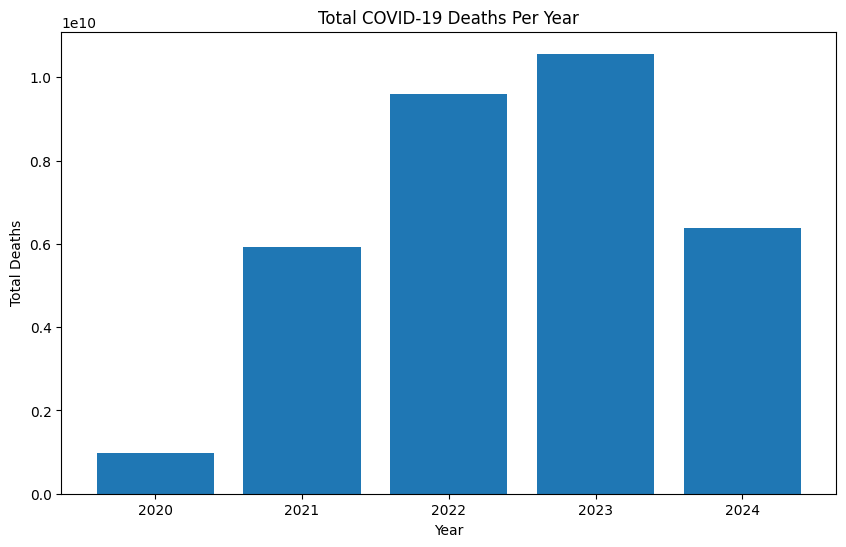

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(yearly_deaths.index, yearly_deaths.values)
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.title('Total COVID-19 Deaths Per Year')
plt.show()

## Summary:

### Data Analysis Key Findings

*   The total COVID-19 deaths were calculated for each year from 2020 to 2024 by grouping the data by year and summing the `total_deaths`.
*   A bar chart was successfully created to visualize the total deaths per year, with 'Year' on the x-axis and 'Total Deaths' on the y-axis, titled 'Total COVID-19 Deaths Per Year'.

### Insights or Next Steps

*   Analyze the year-over-year trend in total deaths to understand the progression of the pandemic's impact.
*   Investigate potential factors contributing to the changes in total deaths observed across different years.


## Data aggregation

### Subtask:
Group the data by year and sum the new cases and new deaths.

**Reasoning**:
Group the data by year and calculate the sum of new cases and new deaths for each year to prepare for plotting.

In [ ]:
yearly_new_cases_deaths = df.groupby('year')[['new_cases', 'new_deaths']].sum()
display(yearly_new_cases_deaths)

,new_cases,new_deaths
year,,
2020,3.359759e+08,7970042.0
2021,8.390316e+08,14724578.0
2022,1.821211e+09,5285680.0
2023,2.834679e+08,1347670.0
2024,8.705598e+06,175093.0


## Data visualization

### Subtask:
Create a single plot to visualize the new cases and new deaths per year.

**Reasoning**:
Create a line plot showing both 'new_cases' and 'new_deaths' over the years using the `yearly_new_cases_deaths` DataFrame.

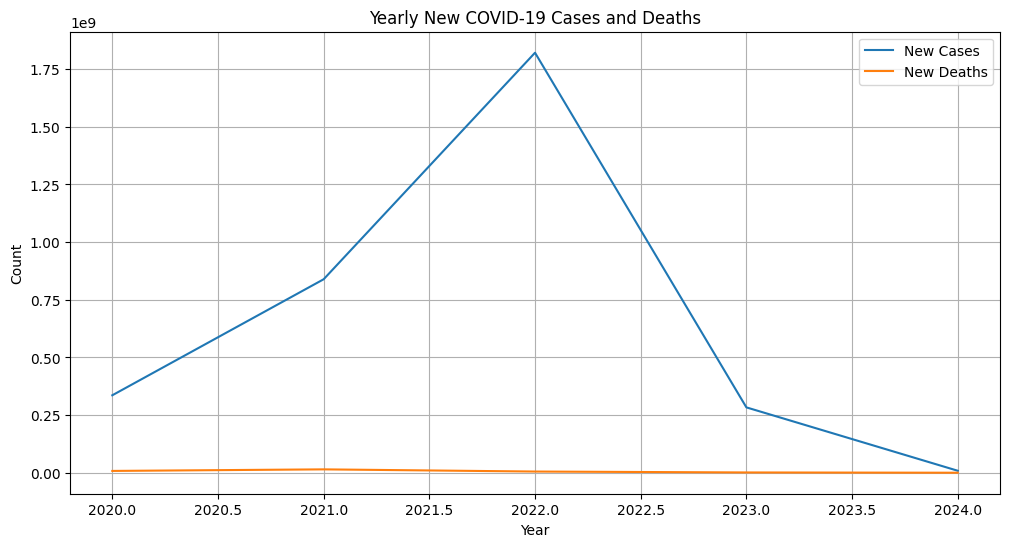

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(yearly_new_cases_deaths.index, yearly_new_cases_deaths['new_cases'], label='New Cases')
plt.plot(yearly_new_cases_deaths.index, yearly_new_cases_deaths['new_deaths'], label='New Deaths')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Yearly New COVID-19 Cases and Deaths')
plt.legend()
plt.grid(True)
plt.show()

## Data filtering

### Subtask:
Filter the DataFrame to include only data from the year 2020.

**Reasoning**:
Filter the original DataFrame to select only the rows where the year is 2020.

In [ ]:
df_2020 = df[df['year'] == 2020]
display(df_2020.head())

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,year
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN,2020
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN,2020
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN,2020
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN,2020
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN,2020


## Data visualization

### Subtask:
Create a plot to visualize the new cases and new deaths in the year 2020.

**Reasoning**:
Create a line plot showing 'new_cases' and 'new_deaths' over time for the year 2020.

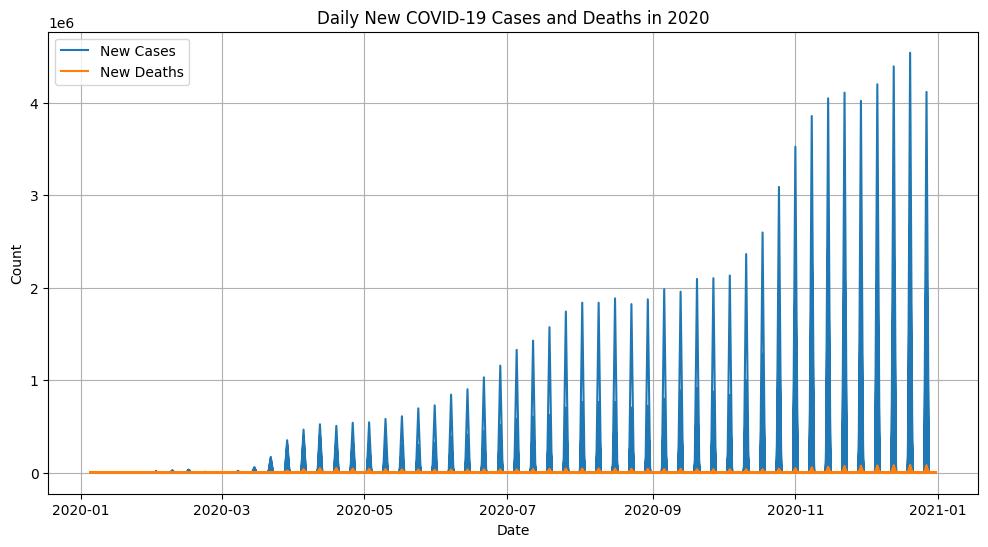

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_2020['date'], df_2020['new_cases'], label='New Cases')
plt.plot(df_2020['date'], df_2020['new_deaths'], label='New Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Daily New COVID-19 Cases and Deaths in 2020')
plt.legend()
plt.grid(True)
plt.show()

## Data visualization

### Subtask:
Create a single plot to visualize the new cases and new deaths per year using a line plot.

## Data visualization

### Subtask:
Create a scatter plot with connecting lines to visualize the new cases and new deaths per year.

**Reasoning**:
Create a scatter plot to visualize 'new_cases' and 'new_deaths' over the years, connecting the points with lines to show the trend.

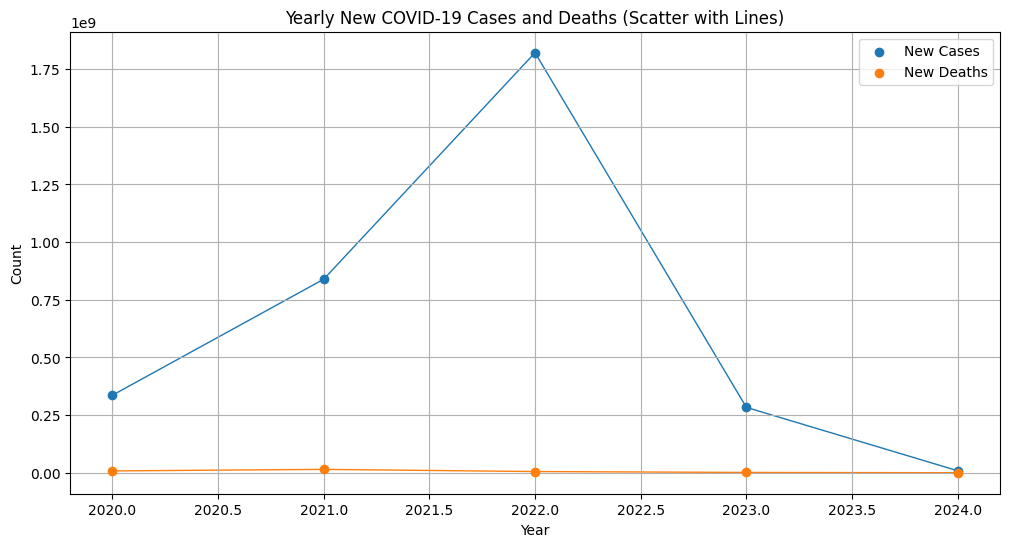

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Scatter plot for new cases
plt.scatter(yearly_new_cases_deaths.index, yearly_new_cases_deaths['new_cases'], label='New Cases', zorder=5)
# Line to connect new cases scatter points
plt.plot(yearly_new_cases_deaths.index, yearly_new_cases_deaths['new_cases'], color='C0', linestyle='-', linewidth=1, zorder=1)


# Scatter plot for new deaths
plt.scatter(yearly_new_cases_deaths.index, yearly_new_cases_deaths['new_deaths'], label='New Deaths', zorder=5)
# Line to connect new deaths scatter points
plt.plot(yearly_new_cases_deaths.index, yearly_new_cases_deaths['new_deaths'], color='C1', linestyle='-', linewidth=1, zorder=1)


plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Yearly New COVID-19 Cases and Deaths (Scatter with Lines)')
plt.legend()
plt.grid(True)
plt.show()

### Example of a Line Plot
Line plots are great for showing trends over time or a continuous variable.

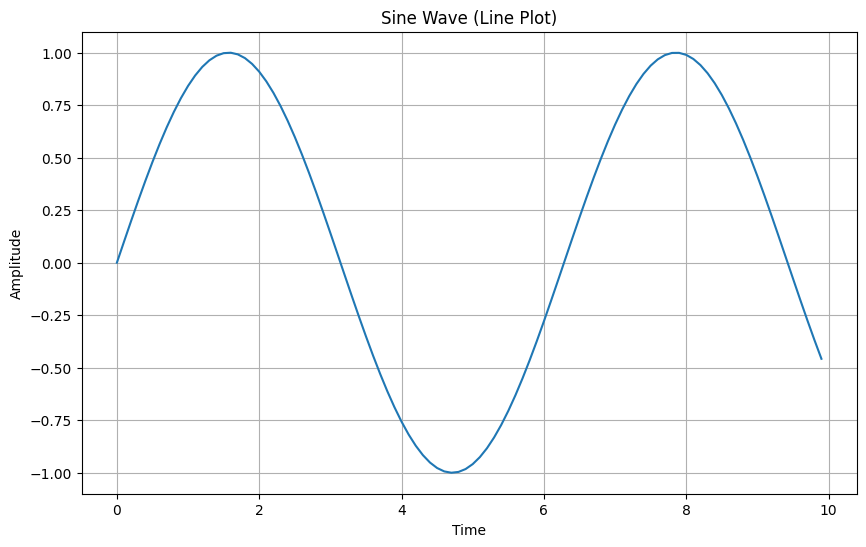

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example data for a line plot
time = np.arange(0, 10, 0.1)
amplitude = np.sin(time)

plt.figure(figsize=(10, 6))
plt.plot(time, amplitude)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sine Wave (Line Plot)')
plt.grid(True)
plt.show()

### Example of a Bar Chart
Bar charts are useful for comparing categorical data or showing counts.

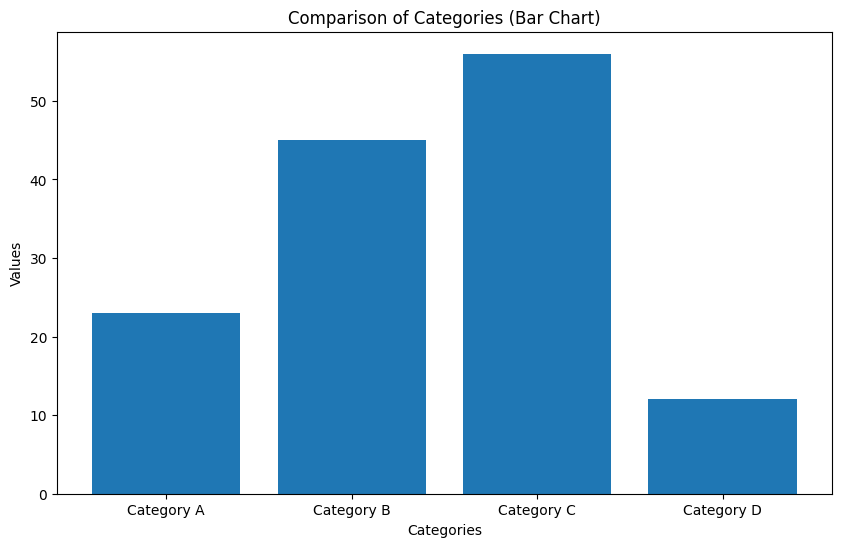

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Example data for a bar chart
categories = ['Category A', 'Category B', 'Category C', 'Category D']
values = [23, 45, 56, 12]

plt.figure(figsize=(10, 6))
plt.bar(categories, values)
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Comparison of Categories (Bar Chart)')
plt.show()

### Example of a Scatter Plot
Scatter plots show the relationship between two numerical variables.

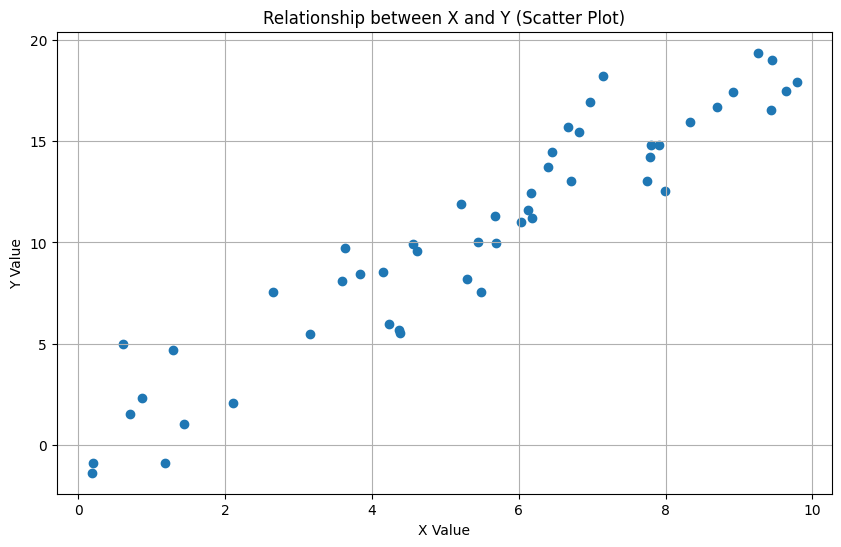

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example data for a scatter plot
np.random.seed(0)
x = np.random.rand(50) * 10
y = 2 * x + np.random.randn(50) * 2

plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.title('Relationship between X and Y (Scatter Plot)')
plt.grid(True)
plt.show()

### Example of a Histogram
Histograms show the distribution of a single numerical variable.

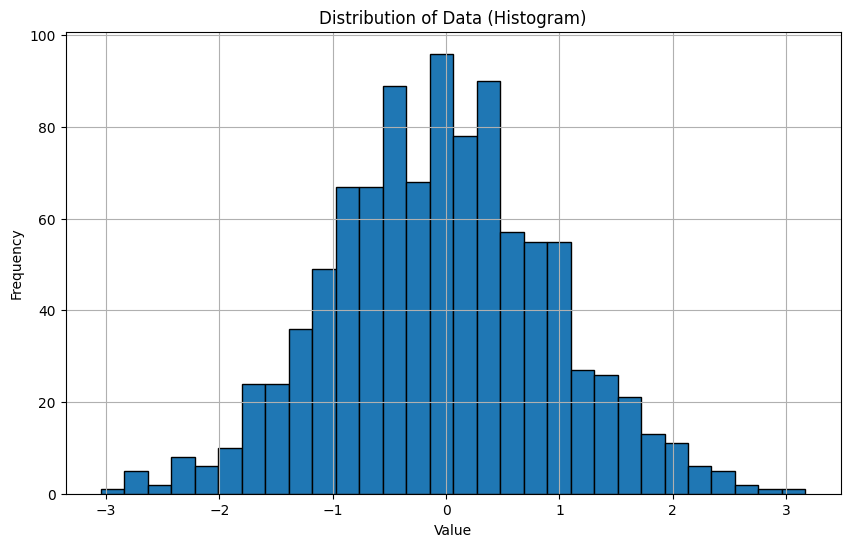

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example data for a histogram
data = np.random.randn(1000)

plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Data (Histogram)')
plt.grid(True)
plt.show()

### Example of a Box Plot
Box plots display the distribution of data through quartiles and show potential outliers.

/tmp/ipython-input-3365514026.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Dataset 1', 'Dataset 2', 'Dataset 3'])


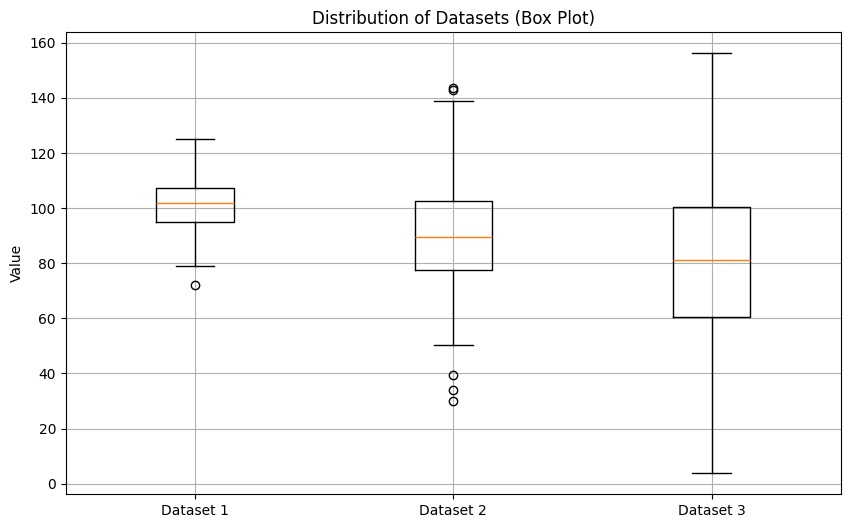

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example data for a box plot
data1 = np.random.normal(100, 10, 200)
data2 = np.random.normal(90, 20, 200)
data3 = np.random.normal(80, 30, 200)
data = [data1, data2, data3]

plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=['Dataset 1', 'Dataset 2', 'Dataset 3'])
plt.ylabel('Value')
plt.title('Distribution of Datasets (Box Plot)')
plt.grid(True)
plt.show()

### Explanation of the Box Plot Code

### Explanation of the Box Plot Code

The code for the box plot does the following:

1.  **Import Libraries**: Imports `matplotlib.pyplot` for plotting, `pandas` for data manipulation, and `numpy` for numerical operations.
2.  **Create Example Data**: Generates three sets of random data with different means and standard deviations to simulate different distributions.
3.  **Prepare Data for Plotting**: Stores the three datasets in a list called `data`.
4.  **Create Box Plot**: Uses `plt.boxplot()` to create the box plot.
    *   The `data` list provides the data for each box.
    *   `labels` (or `tick_labels` as suggested by the warning) assigns labels to each box on the x-axis.
5.  **Set Labels and Title**: Sets the y-axis label to 'Value' and the title of the plot to 'Distribution of Datasets (Box Plot)'.
6.  **Add Grid**: Adds a grid to the plot for easier readability.
7.  **Show Plot**: Displays the generated box plot.

The warning you see (`MatplotlibDeprecationWarning`) indicates that the `labels` parameter in `plt.boxplot()` is being renamed to `tick_labels` in future versions of Matplotlib. The code still works for now, but it's good practice to update it to use `tick_labels` to avoid warnings and ensure compatibility in the future.

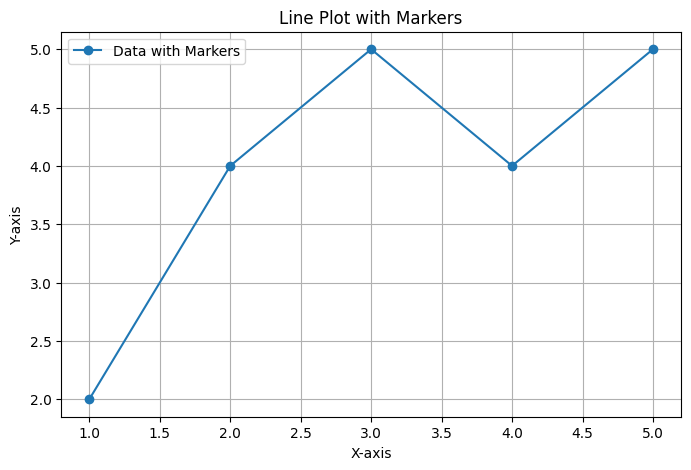

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

plt.figure(figsize=(8, 5))
plt.plot(x, y, marker='o', linestyle='-', label='Data with Markers') # 'o' is for circle markers
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Line Plot with Markers')
plt.legend()
plt.grid(True)
plt.show()

### Explanation of the Line Plot with Markers Code

The code for the line plot with markers does the following:

1.  **Import Libraries**: Imports `matplotlib.pyplot` for plotting and `numpy` for numerical operations.
2.  **Create Example Data**: Defines simple `x` and `y` arrays as example data points.
3.  **Create Figure**: Creates a figure and axes for the plot with a specified size.
4.  **Create Line Plot with Markers**: Uses `plt.plot()` to create the line plot:
    *   `x` and `y` provide the data points.
    *   `marker='o'` adds circle markers at each data point. You can use different characters for different marker styles (e.g., 'x', '^', 's').
    *   `linestyle='-'` specifies a solid line connecting the markers. Other options include '--' (dashed), '-.' (dash-dot), and ':' (dotted).
    *   `label='Data with Markers'` sets the label for this plot, which will be used in the legend.
5.  **Set Labels and Title**: Sets the x-axis label to 'X-axis', the y-axis label to 'Y-axis', and the title of the plot to 'Line Plot with Markers'.
6.  **Add Legend**: Displays the legend, which uses the `label` provided in the `plt.plot()` call.
7.  **Add Grid**: Adds a grid to the plot for easier readability.
8.  **Show Plot**: Displays the generated plot.

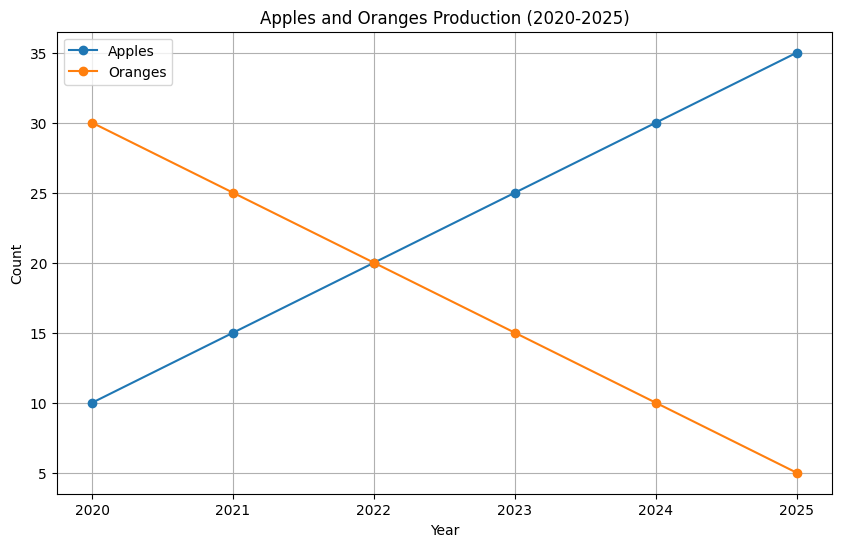

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Years from 2020 to 2025
years = np.arange(2020, 2026)

# Example data: apples increasing, oranges decreasing
apples = np.array([10, 15, 20, 25, 30, 35])
oranges = np.array([30, 25, 20, 15, 10, 5])

plt.figure(figsize=(10, 6))

plt.plot(years, apples, marker='o', linestyle='-', label='Apples')
plt.plot(years, oranges, marker='o', linestyle='-', label='Oranges')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Apples and Oranges Production (2020-2025)')
plt.legend()
plt.grid(True)
plt.show()

### Explanation of the Apples and Oranges Plot Code

The code for the apples and oranges plot does the following:

1.  **Import Libraries**: Imports `matplotlib.pyplot` for plotting and `numpy` for numerical operations.
2.  **Create Data**:
    *   `years`: Creates a NumPy array for the years from 2020 to 2025.
    *   `apples`: Creates a NumPy array representing an increasing trend in apple production over the years.
    *   `oranges`: Creates a NumPy array representing a decreasing trend in orange production over the years.
3.  **Create Figure**: Creates a figure and axes for the plot with a specified size.
4.  **Create Line Plots**: Uses `plt.plot()` twice to create two line plots on the same axes:
    *   The first `plt.plot()` uses `years` and `apples` data, with circle markers (`'o'`), a solid line (`'-'`), and the label 'Apples'.
    *   The second `plt.plot()` uses `years` and `oranges` data, also with circle markers, a solid line, and the label 'Oranges'.
5.  **Set Labels and Title**: Sets the x-axis label to 'Year', the y-axis label to 'Count', and the title of the plot to 'Apples and Oranges Production (2020-2025)'.
6.  **Add Legend**: Displays the legend, which uses the labels provided in the `plt.plot()` calls to identify each line.
7.  **Add Grid**: Adds a grid to the plot for easier readability.
8.  **Show Plot**: Displays the generated plot.

## Scatter Plot with Seaborn and Iris Dataset

### Load the Iris dataset and explore

In [ ]:
import seaborn as sns
import pandas as pd

# Load the Iris dataset
iris = sns.load_dataset('iris')

# Display unique species
print("Unique species in the Iris dataset:", iris['species'].unique())

# Display the first few rows of the dataset
display(iris.head())

Unique species in the Iris dataset: ['setosa' 'versicolor' 'virginica']


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# Display information about the dataset
print("Dataset Information:")
iris.info()

# Display descriptive statistics
print("\nDescriptive Statistics:")
display(iris.describe())

# Display columns
print("\nColumns in the dataset:")
print(iris.columns)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

Descriptive Statistics:


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000



Columns in the dataset:
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


### Explanation of Dataset Description and Columns

The code above provides information about the Iris dataset:

1.  **`iris.info()`**: This method prints a concise summary of the DataFrame. It includes:
    *   The index dtype and columns.
    *   Non-null values in each column.
    *   Dtypes of each column.
    *   Memory usage.
    This helps you understand the structure and data types of your dataset.

2.  **`iris.describe()`**: This method generates descriptive statistics of the numerical columns in the DataFrame. It includes:
    *   `count`: The number of non-null values.
    *   `mean`: The average value.
    *   `std`: The standard deviation (a measure of the spread of the data).
    *   `min`: The minimum value.
    *   `25%`: The first quartile (25th percentile).
    *   `50%`: The median (50th percentile).
    *   `75%`: The third quartile (75th percentile).
    *   `max`: The maximum value.
    This gives you a quick overview of the central tendency, dispersion, and shape of the distribution of your numerical data.

3.  **`iris.columns`**: This attribute returns an Index object containing the column labels of the DataFrame. This is useful for quickly seeing the names of all the columns in your dataset.

### Visualize the relationship between sepal length and sepal width

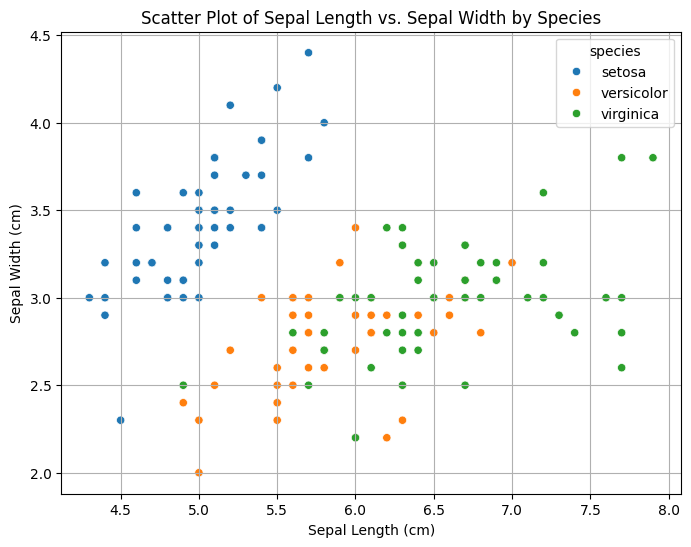

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species')
plt.title('Scatter Plot of Sepal Length vs. Sepal Width by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.grid(True)
plt.show()

### Explanation of the Sepal Length vs. Sepal Width Scatter Plot Code

The code for the scatter plot does the following:

1.  **Import Libraries**: Imports `seaborn` for enhanced visualizations and `matplotlib.pyplot` for plotting customization.
2.  **Create Figure**: Creates a figure and axes for the plot with a specified size using `plt.figure()`.
3.  **Create Scatter Plot**: Uses `seaborn.scatterplot()` to create the scatter plot:
    *   `data=iris`: Specifies that the data for the plot comes from the `iris` DataFrame.
    *   `x='sepal_length'`: Sets the 'sepal_length' column as the data for the x-axis.
    *   `y='sepal_width'`: Sets the 'sepal_width' column as the data for the y-axis.
    *   `hue='species'`: Colors the points based on the unique values in the 'species' column, automatically creating a legend.
4.  **Set Labels and Title**: Sets the title of the plot, and labels for the x and y axes to make the plot informative.
5.  **Add Grid**: Adds a grid to the plot for easier readability of the data points.
6.  **Show Plot**: Displays the generated scatter plot.

This plot helps visualize the relationship between sepal length and sepal width and how this relationship varies across the different iris species.

### Explanation of the Sepal Length vs. Sepal Width Scatter Plot Code

The code for the scatter plot aims to **visualize the relationship between sepal length and sepal width in the Iris dataset and see how this relationship differs across the three species.**

Here's what each part of the code is doing:

1.  **Import Libraries**:
    *   `import seaborn as sns`: Imports the seaborn library, commonly used for statistical data visualization, and assigns it the alias `sns`. We use seaborn because it provides a high-level interface for creating attractive and informative statistical graphics.
    *   `import matplotlib.pyplot as plt`: Imports the matplotlib.pyplot module, a plotting library, and assigns it the alias `plt`. We use matplotlib for further customization of the plot, such as setting figure size, adding titles and labels, and showing the plot.

2.  **Create Figure**:
    *   `plt.figure(figsize=(8, 6))`: Creates a new figure and a set of axes for the plot. `figsize=(8, 6)` sets the dimensions of the figure to 8 inches wide and 6 inches tall, providing a reasonable size for the visualization.

3.  **Create Scatter Plot**:
    *   `sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species')`: This is the core line for creating the scatter plot using seaborn.
        *   `data=iris`: Specifies that the data for the plot comes from the pandas DataFrame named `iris`.
        *   `x='sepal_length'`: Maps the 'sepal\_length' column of the `iris` DataFrame to the x-axis of the scatter plot. This displays the sepal length values on the horizontal axis.
        *   `y='sepal_width'`: Maps the 'sepal\_width' column of the `iris` DataFrame to the y-axis of the scatter plot. This displays the sepal width values on the vertical axis.
        *   `hue='species'`: This is a key parameter that colors the scatter points based on the unique values in the 'species' column. This is crucial for visualizing how the relationship between sepal length and sepal width varies for each of the three iris species (setosa, versicolor, and virginica). Seaborn automatically creates a legend to identify which color corresponds to which species.

4.  **Set Labels and Title**:
    *   `plt.title('Scatter Plot of Sepal Length vs. Sepal Width by Species')`: Sets the title of the plot to clearly indicate what the plot represents.
    *   `plt.xlabel('Sepal Length (cm)')`: Sets the label for the x-axis, specifying that it represents the sepal length in centimeters.
    *   `plt.ylabel('Sepal Width (cm)')`: Sets the label for the y-axis, specifying that it represents the sepal width in centimeters. Adding units like "(cm)" makes the labels more informative.

5.  **Add Grid**:
    *   `plt.grid(True)`: Adds a grid to the plot. This makes it easier to read the values of the data points by providing visual reference lines.

6.  **Show Plot**:
    *   `plt.show()`: Displays the generated plot. This command renders the figure and shows it to the user.

By using a scatter plot with `sepal_length` and `sepal_width` on the axes and coloring by `species`, we can visually assess if there's a correlation between these two features and if the different species occupy distinct regions on the plot, suggesting that sepal dimensions are useful for differentiating between iris species.

### Visualize the relationship between sepal length and sepal width for each species

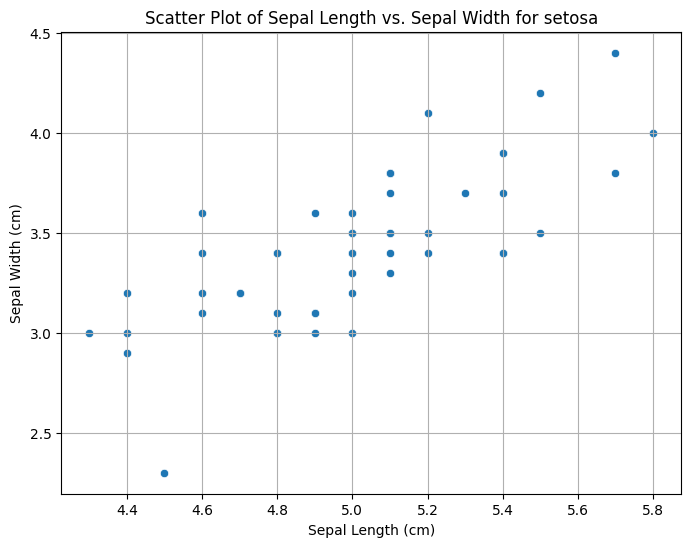

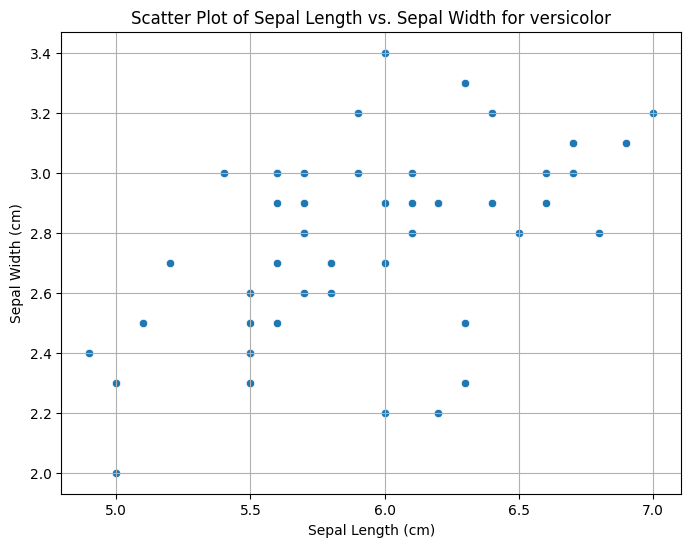

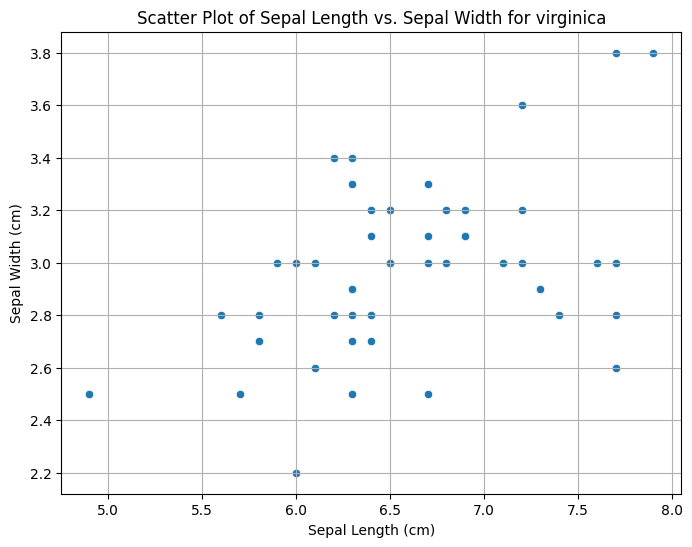

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique species
unique_species = iris['species'].unique()

# Create a scatter plot for each species
for species in unique_species:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=iris[iris['species'] == species], x='sepal_length', y='sepal_width')
    plt.title(f'Scatter Plot of Sepal Length vs. Sepal Width for {species}')
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Sepal Width (cm)')
    plt.grid(True)
    plt.show()

### Visualize the relationship between sepal length and sepal width with trend lines for each species

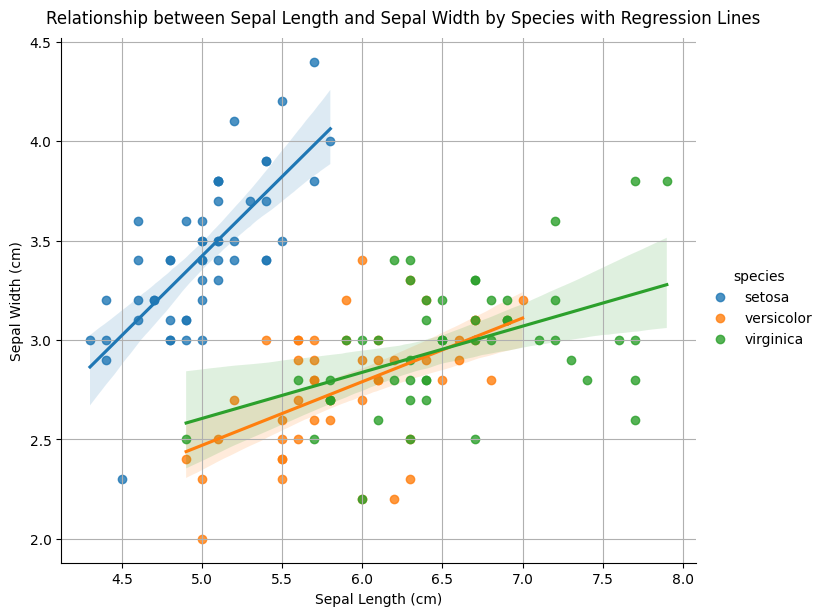

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot with a regression line for each species
sns.lmplot(data=iris, x='sepal_length', y='sepal_width', hue='species', height=6, aspect=1.2)
plt.suptitle('Relationship between Sepal Length and Sepal Width by Species with Regression Lines', y=1.02)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.grid(True)
plt.show()

### Explanation of the Scatter Plot with Regression Lines Code

The code for the scatter plot with regression lines does the following:

1.  **Import Libraries**: Imports `seaborn` for enhanced visualizations and `matplotlib.pyplot` for plotting customization.
2.  **Create Scatter Plot with Regression Lines**: Uses `seaborn.lmplot()` to create the plot:
    *   `data=iris`: Specifies that the data for the plot comes from the `iris` DataFrame.
    *   `x='sepal_length'`: Sets the 'sepal\_length' column as the data for the x-axis.
    *   `y='sepal_width'`: Sets the 'sepal\_width' column as the data for the y-axis.
    *   `hue='species'`: Colors the points and the regression lines based on the unique values in the 'species' column. `lmplot` creates a separate plot for each unique value in the `hue` column, but by default, it puts them all on the same figure with different colors.
    *   `height=6`: Sets the height of each facet (in this case, the single plot since `hue` is used to color within one plot) in inches.
    *   `aspect=1.2`: Sets the aspect ratio of each facet, so the width is `aspect * height`. This helps control the shape of the plot.
3.  **Set Title**: `plt.suptitle('Relationship between Sepal Length and Sepal Width by Species with Regression Lines', y=1.02)` sets a super title for the entire figure. `y=1.02` adjusts the vertical position of the title to be slightly above the plots.
4.  **Set Labels**: Sets the x-axis and y-axis labels using `plt.xlabel()` and `plt.ylabel()`. Although `lmplot` often handles labels, setting them explicitly with `plt` can ensure they are correct, especially with super titles.
5.  **Add Grid**: `plt.grid(True)` adds a grid to the plot for easier readability.
6.  **Show Plot**: `plt.show()` displays the generated plot.

`seaborn.lmplot()` is particularly useful here because it not only shows the scatter plot of the data points but also fits and plots a linear regression model for each species, along with a shaded confidence interval around the regression line. This visually helps to assess the linear relationship between sepal length and sepal width within each species.

### Example of a Histogram
Histograms show the distribution of a single numerical variable.

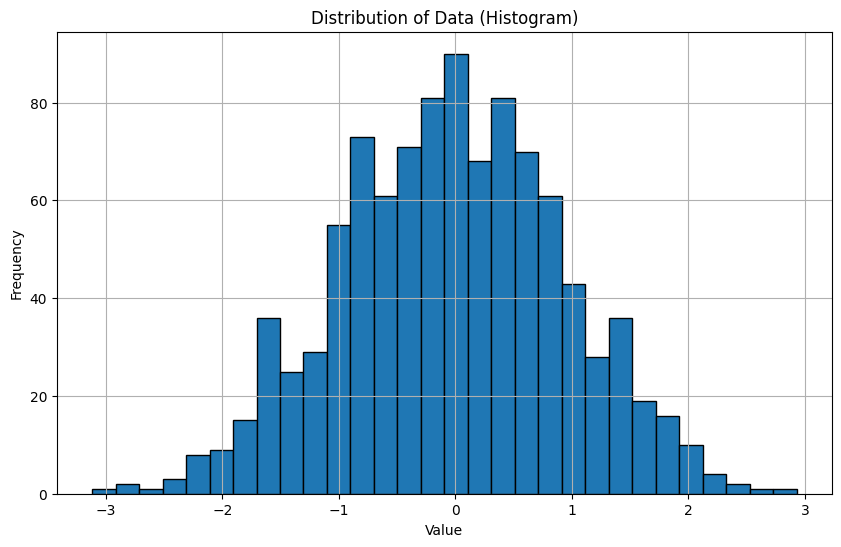

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example data for a histogram
data = np.random.randn(1000)

plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Data (Histogram)')
plt.grid(True)
plt.show()

### Explanation of a Histogram Code

The code for the histogram does the following:

1.  **Import Libraries**: Imports `matplotlib.pyplot` for plotting, `pandas` for data manipulation, and `numpy` for numerical operations.
2.  **Create Example Data**: Generates 1000 random numbers from a standard normal distribution using `np.random.randn(1000)`. This data will be used to demonstrate the histogram.
3.  **Create Figure**: Creates a figure and axes for the plot with a specified size using `plt.figure()`.
4.  **Create Histogram**: Uses `plt.hist()` to create the histogram:
    *   `data`: Provides the numerical data for which the histogram is to be created.
    *   `bins=30`: Specifies the number of bins (intervals) to divide the data into. More bins can show finer details of the distribution, while fewer bins provide a broader overview.
    *   `edgecolor='black'`: Sets the color of the edges of the histogram bars to black, which helps to distinguish the bars.
5.  **Set Labels and Title**: Sets the x-axis label to 'Value', the y-axis label to 'Frequency', and the title of the plot to 'Distribution of Data (Histogram)'.
6.  **Add Grid**: Adds a grid to the plot for easier readability.
7.  **Show Plot**: Displays the generated histogram.

Histograms are useful for understanding the distribution of a single numerical variable, showing where values are concentrated, whether the distribution is symmetric or skewed, and if there are any outliers.

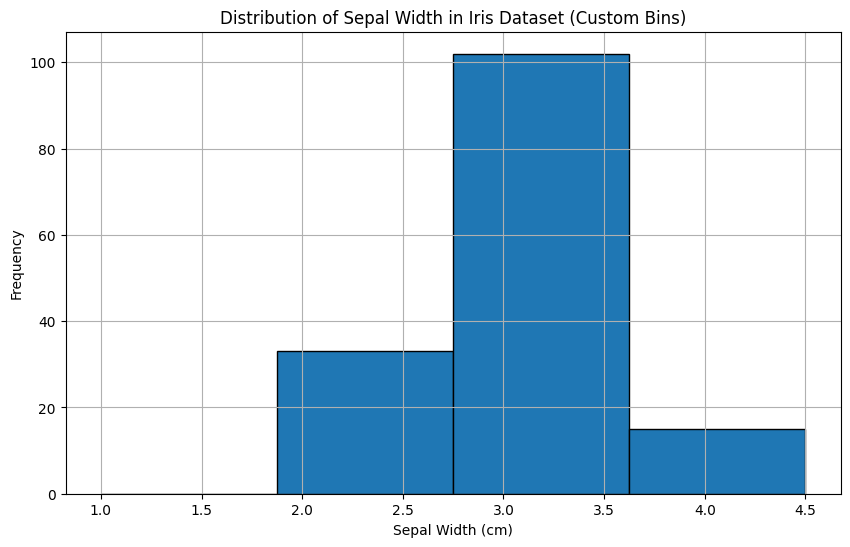

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the bins
bins = np.linspace(1, 4.5, 5)

plt.figure(figsize=(10, 6))
plt.hist(iris['sepal_width'], bins=bins, edgecolor='black')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')
plt.title('Distribution of Sepal Width in Iris Dataset (Custom Bins)')
plt.grid(True)
plt.show()

### Visualize the distribution of Sepal Width for Each Species using Box Plots

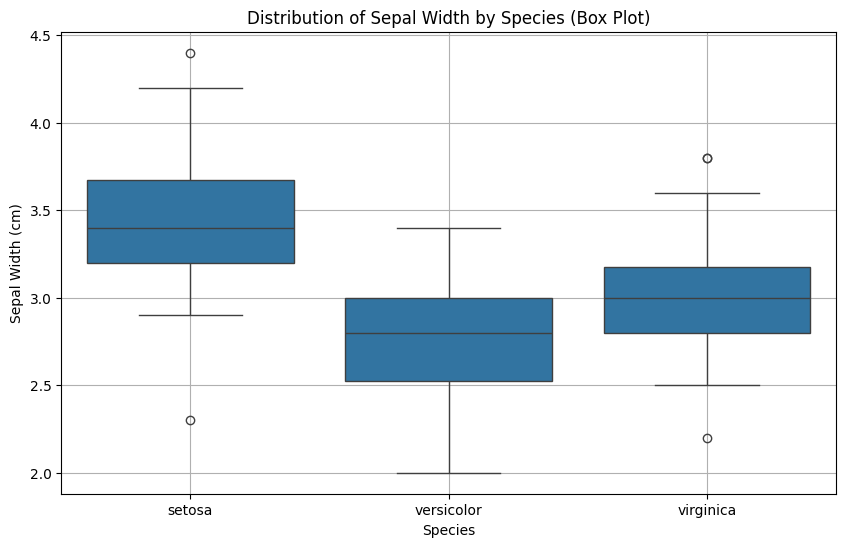

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=iris, x='species', y='sepal_width')
plt.xlabel('Species')
plt.ylabel('Sepal Width (cm)')
plt.title('Distribution of Sepal Width by Species (Box Plot)')
plt.grid(True)
plt.show()

### Explanation of the Sepal Width Distribution by Species Box Plot Code

The code for visualizing the distribution of sepal width for each species using box plots does the following:

1.  **Import Libraries**: Imports `seaborn` and `matplotlib.pyplot` for plotting.
2.  **Create Figure**: Sets the figure size for the plot.
3.  **Create Box Plot**: Uses `seaborn.boxplot()`:
    *   `data=iris`: Specifies the Iris DataFrame.
    *   `x='species'`: Sets the 'species' column on the x-axis to represent the different categories.
    *   `y='sepal_width'`: Sets 'sepal_width' as the numerical variable for which the distribution will be shown on the y-axis.
4.  **Set Labels and Title**: Adds appropriate labels to the x and y axes and sets the title of the plot.
5.  **Add Grid**: Adds a grid for better readability.
6.  **Show Plot**: Displays the generated box plot.

Box plots are useful here for comparing the spread and central tendency of sepal width for each species and identifying potential outliers.

### Visualize the distribution of Sepal Width using Histograms for Each Species

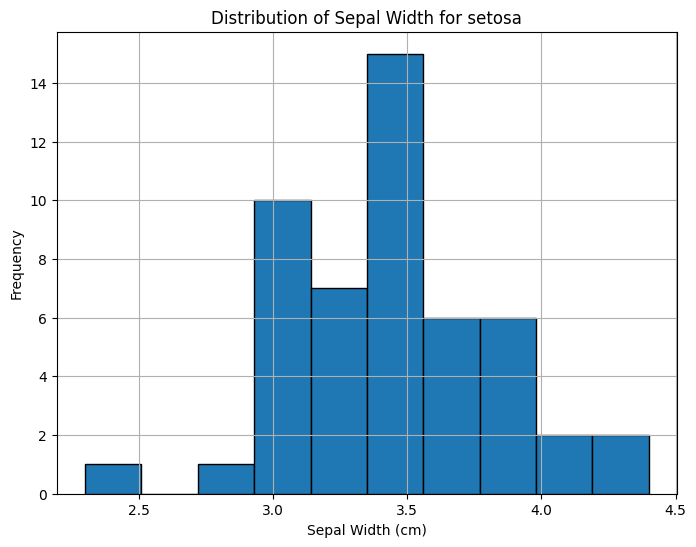

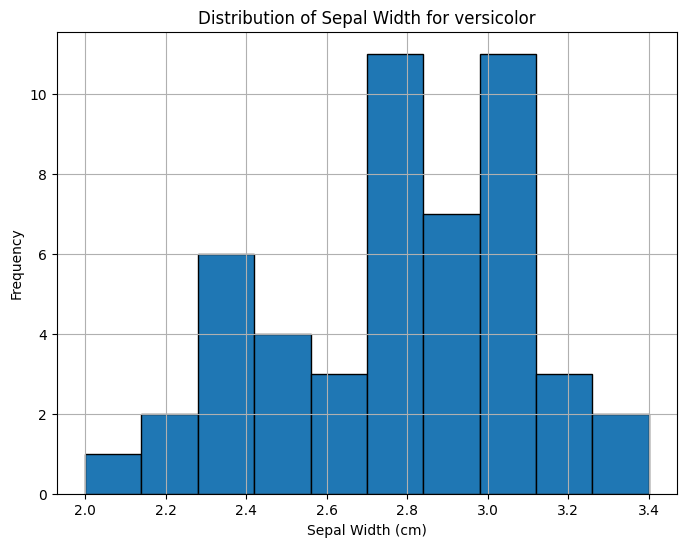

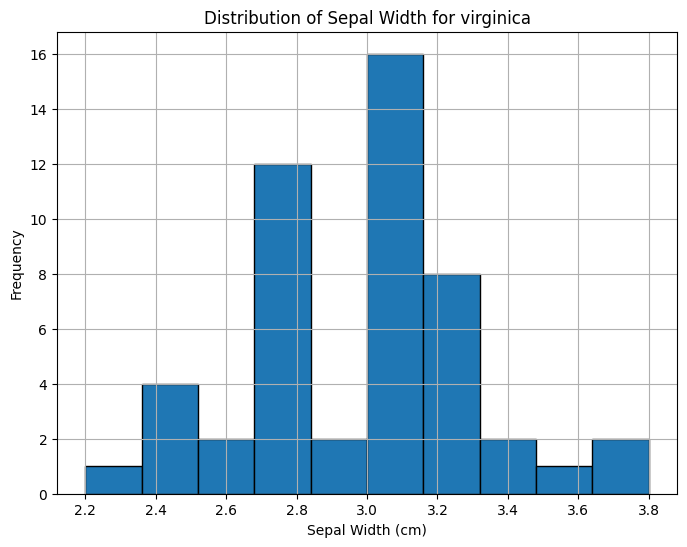

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get unique species
unique_species = iris['species'].unique()

# Create a histogram for each species
for species in unique_species:
    plt.figure(figsize=(8, 6))
    plt.hist(iris[iris['species'] == species]['sepal_width'], bins=10, edgecolor='black') # Using a default of 10 bins
    plt.xlabel('Sepal Width (cm)')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Sepal Width for {species}')
    plt.grid(True)
    plt.show()

### Explanation of the Sepal Width Distribution by Species Histograms Code

The code for visualizing the distribution of sepal width for each species using separate histograms does the following:

1.  **Import Libraries**: Imports `matplotlib.pyplot` for plotting and `seaborn` (though seaborn isn't directly used for the plotting function here, it was used to load the data).
2.  **Get Unique Species**: Retrieves the list of unique species names from the 'species' column of the `iris` DataFrame.
3.  **Loop Through Species**: It then iterates through each unique species name.
4.  **Create Figure for Each Species**: Inside the loop, `plt.figure(figsize=(8, 6))` creates a new, separate figure for each species' histogram.
5.  **Create Histogram**: `plt.hist()` is used to create the histogram for the current species:
    *   `iris[iris['species'] == species]['sepal_width']`: This filters the `iris` DataFrame to select only the rows corresponding to the current `species` and then selects the 'sepal_width' column for that filtered data. This provides the data for the histogram.
    *   `bins=10`: Sets the number of bins for the histogram to 10 (a default value is used here, but it can be adjusted).
    *   `edgecolor='black'`: Adds black edges to the bars for better visual separation.
6.  **Set Labels and Title**: Sets the x-axis label to 'Sepal Width (cm)', the y-axis label to 'Frequency', and the title of the plot to clearly indicate which species the histogram represents.
7.  **Add Grid**: Adds a grid to the plot for easier readability.
8.  **Show Plot**: `plt.show()` displays the generated histogram for the current species before the loop continues to the next species.

This approach generates three individual histograms, one for each species, allowing you to examine and compare the distribution of sepal width for 'setosa', 'versicolor', and 'virginica' separately.

### Visualize the overlapping distribution of Sepal Width for Each Species

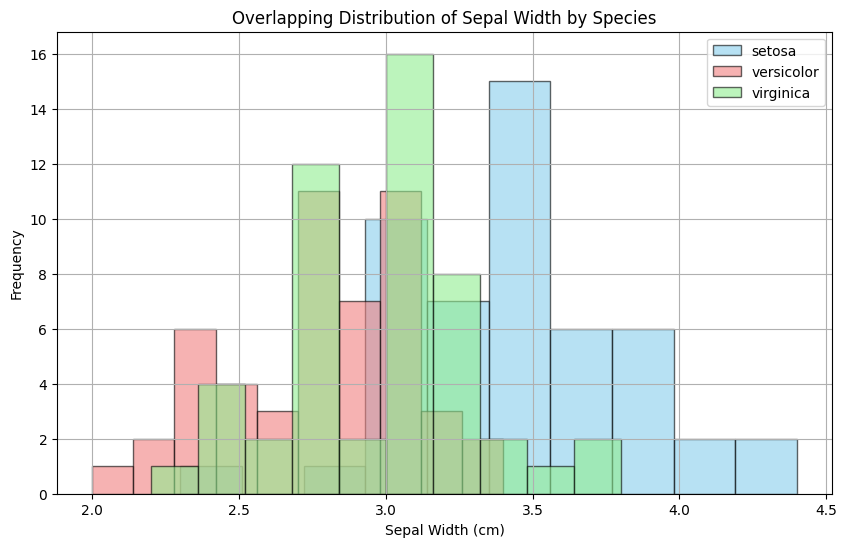

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get unique species and define colors
unique_species = iris['species'].unique()
colors = ['skyblue', 'lightcoral', 'lightgreen'] # Define colors for each species

plt.figure(figsize=(10, 6))

# Plot histogram for each species
for i, species in enumerate(unique_species):
    plt.hist(iris[iris['species'] == species]['sepal_width'],
             bins=10,  # You can adjust the number of bins
             alpha=0.6, # Set opacity for overlap
             label=species,
             color=colors[i],
             edgecolor='black')

plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')
plt.title('Overlapping Distribution of Sepal Width by Species')
plt.legend()
plt.grid(True)
plt.show()

### Explanation of the Overlapping Sepal Width Histograms Code

The code for visualizing the overlapping distribution of sepal width for each species does the following:

1.  **Import Libraries**: Imports `matplotlib.pyplot` for plotting and `seaborn` (used here for data loading).
2.  **Get Unique Species and Define Colors**: Retrieves the unique species names and defines a list of colors to use for each species' histogram.
3.  **Create Figure**: Sets the figure size for the plot.
4.  **Loop and Plot Histograms**: Iterates through each unique species:
    *   `plt.hist()` is used to create a histogram for the current species' sepal width data.
    *   `bins=10`: Sets the number of bins.
    *   `alpha=0.6`: Sets the opacity of the histogram bars to 60% (0.6), allowing you to see through them where they overlap.
    *   `label=species`: Sets the label for the legend.
    *   `color=colors[i]`: Assigns a specific color from the `colors` list to the histogram.
    *   `edgecolor='black'`: Adds black edges to the bars.
5.  **Set Labels and Title**: Adds appropriate labels to the x and y axes and sets the title of the plot.
6.  **Add Legend**: Displays the legend to identify which color corresponds to which species.
7.  **Add Grid**: Adds a grid for better readability.
8.  **Show Plot**: Displays the generated plot.

This plot allows you to see the distributions of sepal width for all three species on a single set of axes and visually compare their ranges and overlaps.

### Bar Chart of Apple and Orange Yield (2000-2005)

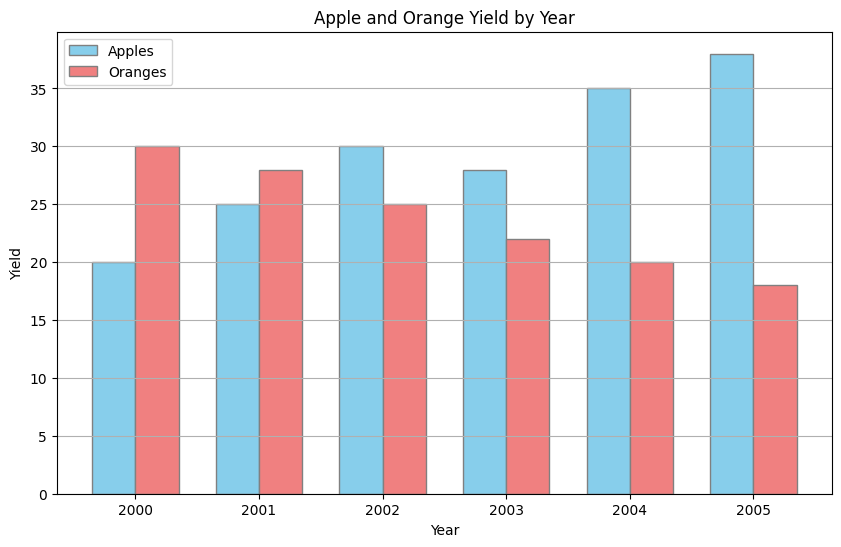

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Years from 2000 to 2005
years = np.arange(2000, 2006)

# Example data for yield
apple_yield = np.array([20, 25, 30, 28, 35, 38])
orange_yield = np.array([30, 28, 25, 22, 20, 18])

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(years))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(10, 6))

# Create bars for apple yield
plt.bar(r1, apple_yield, color='skyblue', width=bar_width, edgecolor='grey', label='Apples')

# Create bars for orange yield
plt.bar(r2, orange_yield, color='lightcoral', width=bar_width, edgecolor='grey', label='Oranges')

# Add xticks on the middle of the group bars
plt.xlabel('Year')
plt.ylabel('Yield')
plt.title('Apple and Orange Yield by Year')
plt.xticks([r + bar_width/2 for r in range(len(years))], years)

plt.legend()
plt.grid(axis='y') # Add horizontal grid lines
plt.show()

### Explanation of the Apple and Orange Yield Bar Chart Code

The code for the bar chart of apple and orange yield does the following:

1.  **Import Libraries**: Imports `matplotlib.pyplot` for plotting and `numpy` for numerical operations.
2.  **Create Data**:
    *   `years`: Creates a NumPy array for the years from 2000 to 2005.
    *   `apple_yield`: Creates a NumPy array with example data for apple yield for each year.
    *   `orange_yield`: Creates a NumPy array with example data for orange yield for each year.
3.  **Set Bar Parameters**:
    *   `bar_width`: Defines the width of each bar.
    *   `r1`: Creates an array of positions for the first set of bars (apples).
    *   `r2`: Creates an array of positions for the second set of bars (oranges), offset by the `bar_width`.
4.  **Create Figure**: Creates a figure and axes for the plot with a specified size.
5.  **Create Bar Plots**: Uses `plt.bar()` twice to create two sets of bars on the same axes:
    *   The first `plt.bar()` plots the `apple_yield` at positions `r1`.
    *   The second `plt.bar()` plots the `orange_yield` at positions `r2`.
    Both calls specify the `color`, `width`, `edgecolor`, and `label` for the legend.
6.  **Set Labels and Title**: Sets the x-axis label to 'Year', the y-axis label to 'Yield', and the title of the plot to 'Apple and Orange Yield by Year'.
7.  **Set X-axis Ticks**: `plt.xticks()` sets the positions and labels for the ticks on the x-axis, centering the year labels between the two bars for each year.
8.  **Add Legend**: Displays the legend to identify which color corresponds to which fruit.
9.  **Add Grid**: Adds horizontal grid lines (`axis='y'`) for easier readability of the yield values.
10. **Show Plot**: Displays the generated plot.

This bar chart allows for a visual comparison of the apple and orange yield for each year from 2000 to 2005.

### Combined Bar and Line Chart of Apple and Orange Data

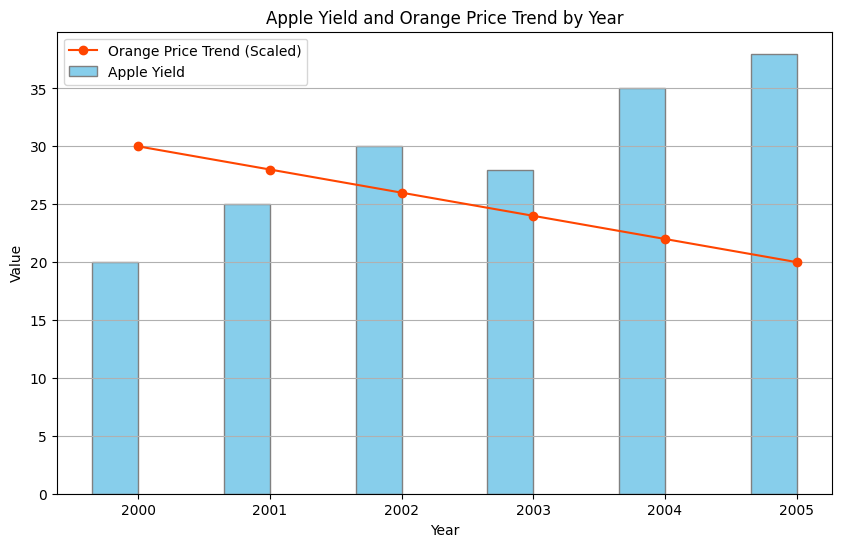

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Years from 2000 to 2005
years = np.arange(2000, 2006)

# Example data for yield and something else (e.g., price trend)
apple_yield = np.array([20, 25, 30, 28, 35, 38])
orange_price_trend = np.array([1.5, 1.4, 1.3, 1.2, 1.1, 1.0]) # Example price trend

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(years))

plt.figure(figsize=(10, 6))

# Create bars for apple yield
plt.bar(r1, apple_yield, color='skyblue', width=bar_width, edgecolor='grey', label='Apple Yield')

# Create a line plot for orange price trend
plt.plot(r1 + bar_width/2, orange_price_trend * 20, color='orangered', marker='o', linestyle='-', label='Orange Price Trend (Scaled)') # Scaling price for visibility on the same axis

# Add xticks
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Apple Yield and Orange Price Trend by Year')
plt.xticks(r1 + bar_width/2, years)

plt.legend()
plt.grid(axis='y') # Add horizontal grid lines
plt.show()

### Explanation of the Combined Bar and Line Chart Code

The code for the combined bar and line chart does the following:

1.  **Import Libraries**: Imports `matplotlib.pyplot` for plotting and `numpy` for numerical operations.
2.  **Create Data**:
    *   `years`: Creates a NumPy array for the years from 2000 to 2005.
    *   `apple_yield`: Creates a NumPy array with example data for apple yield.
    *   `orange_price_trend`: Creates a NumPy array with example data for an orange price trend.
3.  **Set Bar Parameters**:
    *   `bar_width`: Defines the width of the bars.
    *   `r1`: Creates an array of positions for the bars.
4.  **Create Figure**: Creates a figure and axes for the plot.
5.  **Create Bar Plot**: Uses `plt.bar()` to create the bars for `apple_yield`.
6.  **Create Line Plot**: Uses `plt.plot()` to create the line for `orange_price_trend`.
    *   `r1 + bar_width/2`: Adjusts the x-positions of the line points to be in the middle of where the bars would be for each year.
    *   `orange_price_trend * 20`: **Scales the orange price trend data** so it's visible on the same y-axis scale as the apple yield. **Note: When combining plots with different scales, it's often necessary to use a secondary y-axis for clarity, but for this example, we've used scaling for simplicity.**
    *   `marker='o'` and `linestyle='-'`: Add markers and a line to the plot.
    *   `label`: Sets the label for the legend.
7.  **Set Labels and Title**: Sets the labels for the x and y axes and the title of the plot.
8.  **Set X-axis Ticks**: Centers the year labels under the combined representation for each year.
9.  **Add Legend**: Displays the legend.
10. **Add Grid**: Adds horizontal grid lines.
11. **Show Plot**: Displays the generated plot.

This combined chart allows you to visualize different types of data (categorical/discrete for bars, continuous/trend for lines) on the same plot to see how they relate over the same x-axis.

### Stacked Bar Chart of Apple and Orange Yield (2000-2005)

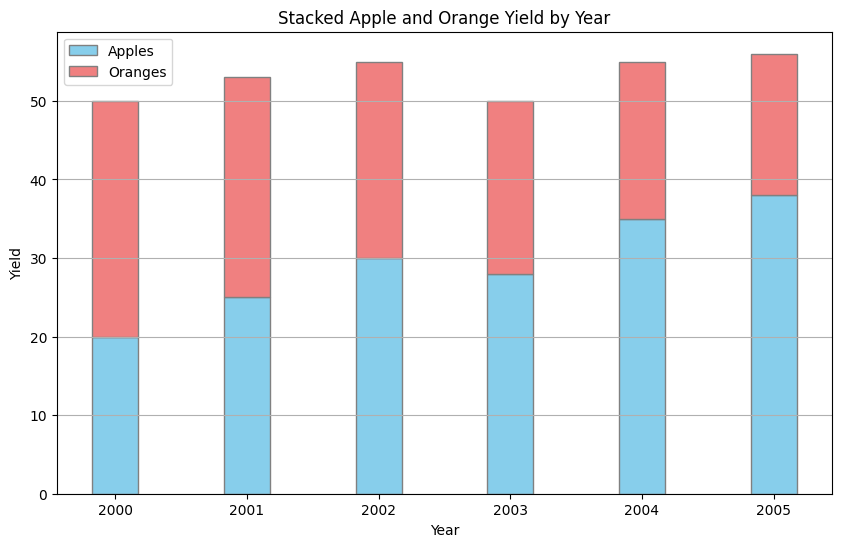

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Years from 2000 to 2005
years = np.arange(2000, 2006)

# Example data for yield
apple_yield = np.array([20, 25, 30, 28, 35, 38])
orange_yield = np.array([30, 28, 25, 22, 20, 18])

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r = np.arange(len(years))

plt.figure(figsize=(10, 6))

# Create bars for apple yield (bottom layer)
plt.bar(r, apple_yield, color='skyblue', edgecolor='grey', width=bar_width, label='Apples')

# Create bars for orange yield (stacked on top of apple yield)
plt.bar(r, orange_yield, bottom=apple_yield, color='lightcoral', edgecolor='grey', width=bar_width, label='Oranges')

# Add xticks
plt.xlabel('Year')
plt.ylabel('Yield')
plt.title('Stacked Apple and Orange Yield by Year')
plt.xticks(r, years)

plt.legend()
plt.grid(axis='y') # Add horizontal grid lines
plt.show()

### Explanation of the Stacked Bar Chart Code

The code for the stacked bar chart of apple and orange yield does the following:

1.  **Import Libraries**: Imports `matplotlib.pyplot` for plotting and `numpy` for numerical operations.
2.  **Create Data**: Defines the `years`, `apple_yield`, and `orange_yield` data.
3.  **Set Bar Parameters**:
    *   `bar_width`: Defines the width of each bar.
    *   `r`: Creates an array of positions for the bars on the x-axis.
4.  **Create Figure**: Creates a figure and axes for the plot.
5.  **Create Stacked Bar Plots**: Uses `plt.bar()` twice:
    *   The first `plt.bar()` creates the bars for `apple_yield` at positions `r`. This forms the bottom layer of the stacked bars.
    *   The second `plt.bar()` creates the bars for `orange_yield` at the same positions `r`. The crucial part is `bottom=apple_yield`, which tells matplotlib to start these bars at the top of the corresponding `apple_yield` bars, effectively stacking them.
    Both calls specify the `color`, `edgecolor`, `width`, and `label` for the legend.
6.  **Set Labels and Title**: Sets the x-axis label to 'Year', the y-axis label to 'Yield', and the title of the plot to 'Stacked Apple and Orange Yield by Year'.
7.  **Set X-axis Ticks**: Sets the positions and labels for the ticks on the x-axis to the corresponding years.
8.  **Add Legend**: Displays the legend.
9.  **Add Grid**: Adds horizontal grid lines.
10. **Show Plot**: Displays the generated plot.

This stacked bar chart is useful for comparing the total yield each year and seeing how the contribution of apples and oranges changes over time.

### Overlapping Bar Chart of Apple and Orange Yield (2000-2005)

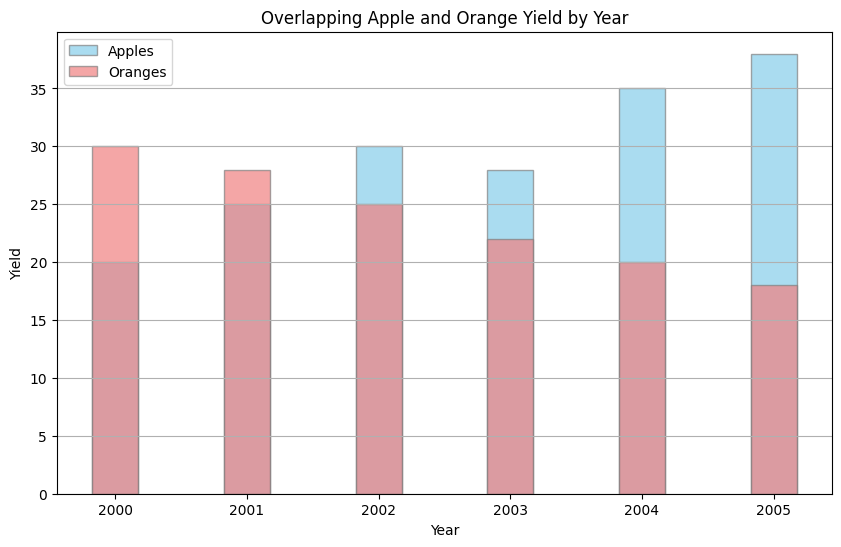

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Years from 2000 to 2005
years = np.arange(2000, 2006)

# Example data for yield
apple_yield = np.array([20, 25, 30, 28, 35, 38])
orange_yield = np.array([30, 28, 25, 22, 20, 18])

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r = np.arange(len(years))

plt.figure(figsize=(10, 6))

# Create bars for apple yield (overlapping)
plt.bar(r, apple_yield, color='skyblue', edgecolor='grey', width=bar_width, label='Apples', alpha=0.7) # Added alpha for opacity

# Create bars for orange yield (overlapping)
plt.bar(r, orange_yield, color='lightcoral', edgecolor='grey', width=bar_width, label='Oranges', alpha=0.7) # Added alpha for opacity

# Add xticks
plt.xlabel('Year')
plt.ylabel('Yield')
plt.title('Overlapping Apple and Orange Yield by Year')
plt.xticks(r, years)

plt.legend()
plt.grid(axis='y') # Add horizontal grid lines
plt.show()

### Explanation of the Overlapping Bar Chart Code

The code for the overlapping bar chart of apple and orange yield does the following:

1.  **Import Libraries**: Imports `matplotlib.pyplot` for plotting and `numpy` for numerical operations.
2.  **Create Data**: Defines the `years`, `apple_yield`, and `orange_yield` data.
3.  **Set Bar Parameters**:
    *   `bar_width`: Defines the width of each bar.
    *   `r`: Creates an array of positions for the bars on the x-axis.
4.  **Create Figure**: Creates a figure and axes for the plot.
5.  **Create Overlapping Bar Plots**: Uses `plt.bar()` twice with the *same* x-positions (`r`):
    *   The first `plt.bar()` creates the bars for `apple_yield`.
    *   The second `plt.bar()` creates the bars for `orange_yield`.
    By using the same x-positions and setting the `alpha` parameter to a value less than 1 (e.g., 0.7), the bars will overlap, and you will be able to see through them where they intersect.
    Both calls specify the `color`, `edgecolor`, `width`, `label`, and `alpha` for the legend and transparency.
6.  **Set Labels and Title**: Sets the x-axis label to 'Year', the y-axis label to 'Yield', and the title of the plot to 'Overlapping Apple and Orange Yield by Year'.
7.  **Set X-axis Ticks**: Sets the positions and labels for the ticks on the x-axis to the corresponding years.
8.  **Add Legend**: Displays the legend.
9.  **Add Grid**: Adds horizontal grid lines.
10. **Show Plot**: Displays the generated plot.

This overlapping bar chart allows you to compare the yield of apples and oranges for each year by seeing how their bars overlap.

## Tips Dataset with Seaborn

### Load the Tips dataset and explore

In [ ]:
import seaborn as sns
import pandas as pd

# Load the tips dataset
tips = sns.load_dataset('tips')

# Display information about the dataset
print("Dataset Information:")
tips.info()

# Display descriptive statistics
print("\nDescriptive Statistics:")
display(tips.describe())

# Display columns
print("\nColumns in the dataset:")
print(tips.columns)

# Display the first few rows of the dataset
print("\nFirst 5 rows of the dataset:")
display(tips.head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB

Descriptive Statistics:


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000



Columns in the dataset:
Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

First 5 rows of the dataset:


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Explanation of Tips Dataset Loading and Exploration Code

The code above loads the 'tips' dataset from the seaborn library and provides basic information about it:

1.  **Import Libraries**: Imports `seaborn` and `pandas`.
2.  **Load Dataset**: `tips = sns.load_dataset('tips')` loads the dataset into a pandas DataFrame named `tips`.
3.  **Display Information**: `tips.info()` prints a summary of the DataFrame, including column names, non-null counts, and data types.
4.  **Display Descriptive Statistics**: `tips.describe()` calculates and displays descriptive statistics for the numerical columns (count, mean, std, min, max, and quartiles).
5.  **Display Columns**: `tips.columns` prints the names of all the columns in the DataFrame.
6.  **Display Head**: `tips.head()` displays the first 5 rows of the DataFrame, giving a preview of the data.

This initial exploration helps you understand the structure, content, and basic characteristics of the 'tips' dataset.

In [ ]:
tips_bill_avg_day_by = tips.groupby('day')['total_bill'].mean()
print(tips_bill_avg_day_by)

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64


/tmp/ipython-input-1370710021.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips_bill_avg_day_by = tips.groupby('day')['total_bill'].mean()


### Explanation of Average Total Bill by Day Calculation

This code calculates the average total bill for each day of the week in the `tips` dataset.

**Intuition:** We want to see if customers tend to spend more on certain days. To do this, we need to group the data by the day of the week and then find the average total bill for each group.

**What happened:**

1.  `tips.groupby('day')`: This groups the rows of the `tips` DataFrame based on the unique values in the 'day' column (Thur, Fri, Sat, Sun).
2.  `['total_bill']`: After grouping, we select the 'total_bill' column from each group.
3.  `.mean()`: This calculates the mean (average) of the 'total_bill' values for each of the day groups.

**How it happened:** The `groupby()` method, combined with selecting a column and applying an aggregation function (`mean()` in this case), is a powerful way to summarize data based on categories. Pandas efficiently performs this operation, giving us a Series where the index is the unique days and the values are the average total bills for those days.

The result, `tips_bill_avg_day_by`, is a pandas Series containing the average total bill for each day.

### Bar Plot of Average Total Bill by Day

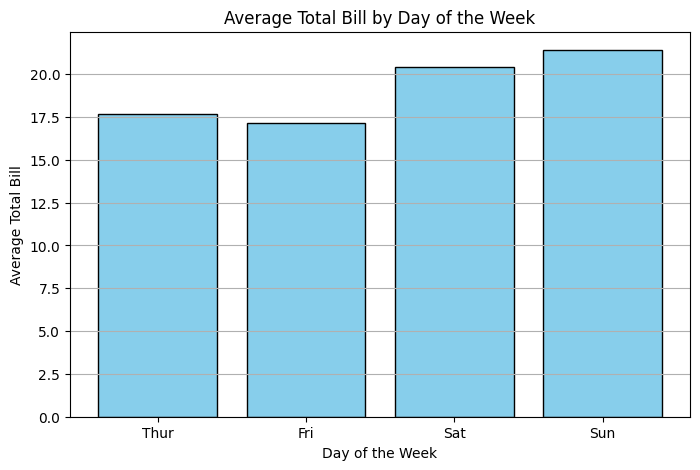

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# The Series tips_bill_avg_day_by was calculated in the previous step
# tips_bill_avg_day_by = tips.groupby('day')['total_bill'].mean() # Assuming this has been run

plt.figure(figsize=(8, 5))
plt.bar(tips_bill_avg_day_by.index, tips_bill_avg_day_by.values, color='skyblue', edgecolor='black')
plt.xlabel('Day of the Week')
plt.ylabel('Average Total Bill')
plt.title('Average Total Bill by Day of the Week')
plt.grid(axis='y') # Add horizontal grid lines
plt.show()

### Explanation of the Average Total Bill by Day Bar Plot Code

The code for the bar plot visualizing the average total bill by day does the following:

1.  **Import Libraries**: Imports `matplotlib.pyplot` for plotting and `pandas` (although not strictly necessary for plotting the Series, it's good practice if you were manipulating the Series further).
2.  **Create Figure**: Creates a figure and axes for the plot with a specified size.
3.  **Create Bar Plot**: Uses `plt.bar()` to create the bar chart:
    *   `tips_bill_avg_day_by.index`: Provides the labels for the x-axis (the days of the week).
    *   `tips_bill_avg_day_by.values`: Provides the heights of the bars (the average total bills).
    *   `color='skyblue'` and `edgecolor='black'`: Set the color of the bars and their edges.
4.  **Set Labels and Title**: Sets the x-axis label to 'Day of the Week', the y-axis label to 'Average Total Bill', and the title of the plot.
5.  **Add Grid**: Adds horizontal grid lines to the plot for easier comparison of the bar heights.
6.  **Show Plot**: Displays the generated bar chart.

This bar chart visually represents the average total bill for each day, making it easy to compare spending habits across different days of the week.

/tmp/ipython-input-491642795.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=tips, x='day', y='total_bill', ci=None) # ci=None removes confidence intervals for a simple bar plot


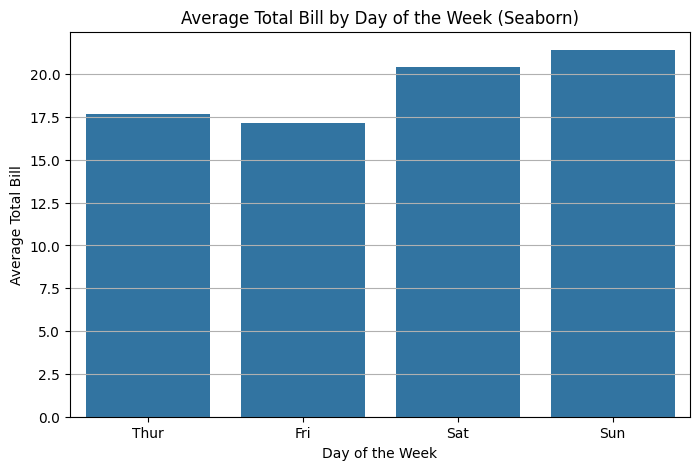

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# The tips dataset is already loaded as 'tips'

plt.figure(figsize=(8, 5))
sns.barplot(data=tips, x='day', y='total_bill', ci=None) # ci=None removes confidence intervals for a simple bar plot
plt.xlabel('Day of the Week')
plt.ylabel('Average Total Bill')
plt.title('Average Total Bill by Day of the Week (Seaborn)')
plt.grid(axis='y') # Add horizontal grid lines
plt.show()

### Explanation of the Seaborn Bar Plot Code

The code for creating the bar plot of average total bill by day using seaborn does the following:

1.  **Import Libraries**: Imports `seaborn` and `matplotlib.pyplot` for plotting.
2.  **Create Figure**: Sets the figure size for the plot using `plt.figure()`.
3.  **Create Bar Plot**: Uses `seaborn.barplot()`:
    *   `data=tips`: Specifies the DataFrame to use.
    *   `x='day'`: Maps the 'day' column to the x-axis (categorical variable).
    *   `y='total_bill'`: Maps the 'total_bill' column to the y-axis (numerical variable). By default, `barplot` calculates the mean of the numerical variable for each category.
    *   `ci=None`: This argument is used to remove the confidence intervals that seaborn's barplot usually displays. We remove them here to create a simple bar chart showing just the average.
4.  **Set Labels and Title**: Sets the x-axis label, y-axis label, and the title of the plot.
5.  **Add Grid**: Adds horizontal grid lines using `plt.grid()`.
6.  **Show Plot**: Displays the generated plot using `plt.show()`.

Seaborn's `barplot` simplifies the process of creating bar charts for categorical data by automatically performing the grouping and aggregation (mean by default).

### Average Total Bill by Day and Sex (Seaborn Bar Plot)

/tmp/ipython-input-3800885314.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=tips, x='day', y='total_bill', hue='sex', ci=None); # ci=None removes confidence intervals for a simple bar plot


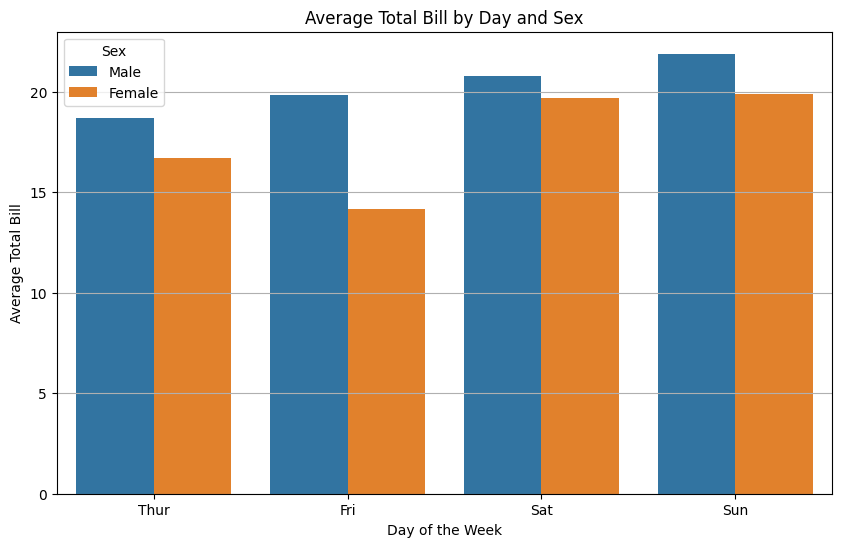

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# The tips dataset is already loaded as 'tips'

plt.figure(figsize=(10, 6))
sns.barplot(data=tips, x='day', y='total_bill', hue='sex', ci=None); # ci=None removes confidence intervals for a simple bar plot
plt.xlabel('Day of the Week')
plt.ylabel('Average Total Bill')
plt.title('Average Total Bill by Day and Sex')
plt.legend(title='Sex')
plt.grid(axis='y') # Add horizontal grid lines
plt.show();

### Explanation of the Average Total Bill by Day and Sex Bar Plot Code

The code for creating the bar plot of average total bill by day and sex using seaborn does the following:

1.  **Import Libraries**: Imports `seaborn` and `matplotlib.pyplot` for plotting.
2.  **Create Figure**: Sets the figure size for the plot using `plt.figure()`.
3.  **Create Bar Plot**: Uses `seaborn.barplot()`:
    *   `data=tips`: Specifies the DataFrame to use.
    *   `x='day'`: Maps the 'day' column to the x-axis.
    *   `y='total_bill'`: Maps the 'total_bill' column to the y-axis.
    *   `hue='sex'`: This is the key parameter that separates the bars based on the unique values in the 'sex' column ('Male' and 'Female') and colors them accordingly.
    *   `ci=None`: Removes the confidence intervals.
4.  **Set Labels and Title**: Sets the x-axis label, y-axis label, and the title of the plot.
5.  **Add Legend**: `plt.legend(title='Sex')` adds a legend to the plot, with the title 'Sex', to identify which color represents which sex.
6.  **Add Grid**: Adds horizontal grid lines using `plt.grid()`.
7.  **Show Plot**: Displays the generated plot.

This plot allows for a comparison of the average total bill on different days of the week, broken down by the sex of the person paying the bill.

### Average Total Bill by Day and Smoker Status (Seaborn Bar Plot)

/tmp/ipython-input-3807900378.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=tips, x='day', y='total_bill', hue='smoker', ci=None) # ci=None removes confidence intervals for a simple bar plot


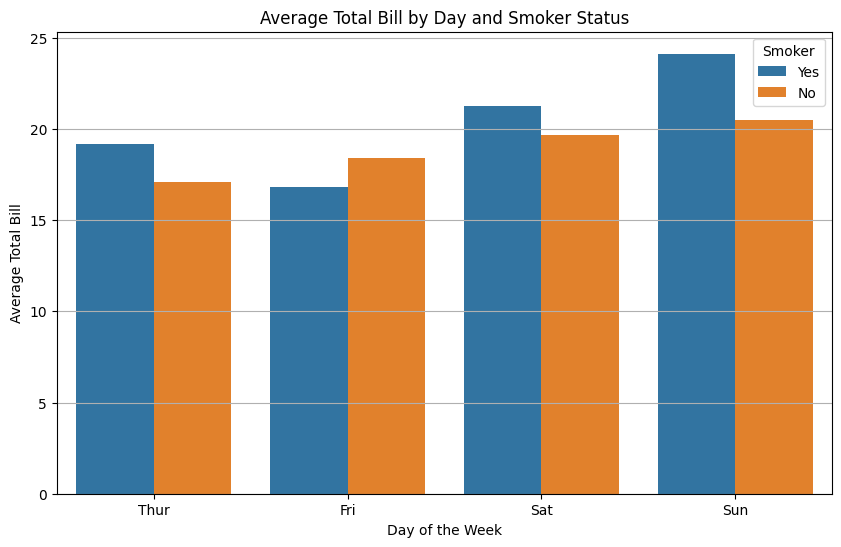

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# The tips dataset is already loaded as 'tips'

plt.figure(figsize=(10, 6))
sns.barplot(data=tips, x='day', y='total_bill', hue='smoker', ci=None) # ci=None removes confidence intervals for a simple bar plot
plt.xlabel('Day of the Week')
plt.ylabel('Average Total Bill')
plt.title('Average Total Bill by Day and Smoker Status')
plt.legend(title='Smoker')
plt.grid(axis='y') # Add horizontal grid lines
plt.show()

### Explanation of the Average Total Bill by Day and Smoker Status Bar Plot Code

The code for creating the bar plot of average total bill by day and smoker status using seaborn does the following:

1.  **Import Libraries**: Imports `seaborn` and `matplotlib.pyplot` for plotting.
2.  **Create Figure**: Sets the figure size for the plot using `plt.figure()`.
3.  **Create Bar Plot**: Uses `seaborn.barplot()`:
    *   `data=tips`: Specifies the DataFrame to use.
    *   `x='day'`: Maps the 'day' column to the x-axis.
    *   `y='total_bill'`: Maps the 'total_bill' column to the y-axis.
    *   `hue='smoker'`: This parameter separates the bars based on the 'smoker' column ('Yes' and 'No') and colors them accordingly.
    *   `ci=None`: Removes the confidence intervals.
4.  **Set Labels and Title**: Sets the x-axis label, y-axis label, and the title of the plot.
5.  **Add Legend**: `plt.legend(title='Smoker')` adds a legend to the plot, with the title 'Smoker', to identify which color represents which smoker status.
6.  **Add Grid**: Adds horizontal grid lines using `plt.grid()`.
7.  **Show Plot**: Displays the generated plot.

This plot allows for a comparison of the average total bill on different days of the week, broken down by whether the person is a smoker or not.

## Understanding Heatmaps: An In-Depth Explanation

Imagine you have a grid of numbers, like a spreadsheet. A heatmap is a way to visualize this grid using colors instead of just numbers. Think of it like a weather map where different temperatures are shown with different colors – red for hot, blue for cold, and shades in between.

**Intuition:**

The basic idea behind a heatmap is to make patterns and relationships in a grid of data easy to see at a glance. Our eyes are very good at spotting differences in color. By assigning a color to each value in the grid, we can quickly see which areas have high values (maybe bright colors) and which have low values (maybe darker colors). This is much faster than reading through all the individual numbers.

**What is a Heatmap?**

A heatmap is a graphical representation of data where the individual values contained in a matrix are represented as colors. It's a way to show the magnitude of a phenomenon as color in two dimensions.

**How are Heatmaps Used?**

Heatmaps are used to:

1.  **Visualize Correlation Matrices:** This is a very common use in data analysis. A correlation matrix shows how strongly pairs of variables are related. A heatmap can display this matrix, with colors indicating the strength and direction of the correlation (e.g., dark blue for strong negative correlation, bright red for strong positive correlation, and a neutral color for no correlation). This helps you quickly identify which variables are strongly related to each other.

2.  **Show Data Intensity or Density:** Heatmaps can show where data points are concentrated. For example, a heatmap on a geographical map can show areas with high population density (darker color) or areas with more customer activity.

3.  **Compare Categorical Data:** Heatmaps can be used to compare the relationship between two categorical variables. For instance, you could have days of the week on one axis, time of day on the other, and the color could represent the average total bill (like in the tips dataset).

4.  **Visualize Missing Data:** Heatmaps can show the pattern of missing values in a dataset, making it easy to see which columns or rows have a lot of missing data.

**Where are Heatmaps Used?**

Heatmaps are used in many fields, including:

*   **Data Science and Analytics:** For exploring relationships between variables, visualizing data distributions, and identifying patterns.
*   **Biology:** To visualize gene expression levels across different samples.
*   **Finance:** To show the performance of different assets or sectors.
*   **Web Design and Marketing:** To track user activity on a website (e.g., showing which areas users click on the most).
*   **Sports Analytics:** To visualize player movement or shot locations on a field.

**When are Heatmaps Used?**

Heatmaps are particularly useful when you have:

*   A matrix or grid-like structure of data.
*   A need to quickly identify patterns, clusters, or outliers in the data.
*   A desire to visualize the relationships between many variables at once (like in a correlation matrix).
*   Categorical data that you want to compare in relation to a numerical value.

**In Layman's Terms (Imagine explaining to a friend):**

"Okay, so imagine you have a bunch of numbers organized in a grid, like a multiplication table, but with different kinds of data. A heatmap is like coloring that table in. Instead of just seeing the numbers, you see colors. If a number is big, maybe it's bright red. If it's small, maybe it's dark blue. If it's in the middle, it's some other color.

This is super helpful because your eyes can instantly see where the 'hot spots' are (the big numbers) and where the 'cold spots' are (the small numbers). It's like looking at a heat sensor picture – you immediately see the temperature differences without having to read every single temperature number.

We use them a lot in data to see if things are related. Like, if we have how much people spend on different days, we could put the days on one side, maybe morning/afternoon/evening on the other, and color each box by the average spending. Then you'd quickly see if people spend more on weekend evenings, for example. It's just a visual shortcut to understand lots of numbers at once!"

**Key Takeaway:**

Heatmaps turn numbers into colors to make patterns visible. They are excellent for summarizing and visualizing relationships in grid-like data.

## Flights Dataset with Seaborn

### Load the Flights dataset and explore

In [ ]:
import seaborn as sns
import pandas as pd

# Load the flights dataset
flights = sns.load_dataset('flights')

# Display information about the dataset
print("Dataset Information:")
flights.info()

# Display descriptive statistics
print("\nDescriptive Statistics:")
display(flights.describe())

# Display columns
print("\nColumns in the dataset:")
print(flights.columns)

# Display the first few rows of the dataset
print("\nFirst 5 rows of the dataset:")
display(flights.head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB

Descriptive Statistics:


,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000



Columns in the dataset:
Index(['year', 'month', 'passengers'], dtype='object')

First 5 rows of the dataset:


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


### Explanation of Flights Dataset Loading and Exploration Code

The code above loads the 'flights' dataset from the seaborn library and provides basic information about it:

1.  **Import Libraries**: Imports `seaborn` and `pandas`.
2.  **Load Dataset**: `flights = sns.load_dataset('flights')` loads the dataset into a pandas DataFrame named `flights`.
3.  **Display Information**: `flights.info()` prints a summary of the DataFrame, including column names, non-null counts, and data types.
4.  **Display Descriptive Statistics**: `flights.describe()` calculates and displays descriptive statistics for the numerical columns (count, mean, std, min, max, and quartiles).
5.  **Display Columns**: `flights.columns` prints the names of all the columns in the DataFrame.
6.  **Display Head**: `flights.head()` displays the first 5 rows of the DataFrame, giving a preview of the data.

This initial exploration helps you understand the structure, content, and basic characteristics of the 'flights' dataset.

In [ ]:
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


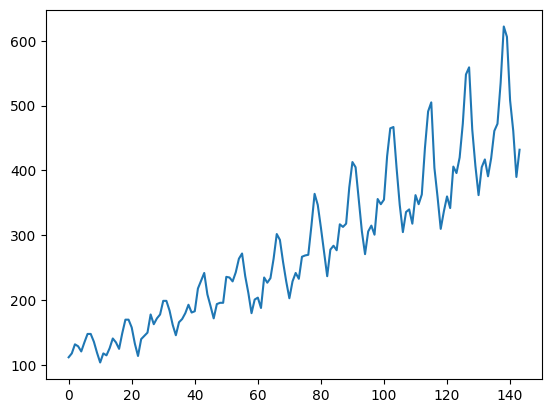

In [ ]:
plt.plot(flights.passengers)

In [ ]:
# Reshape the flights data into a pivot table (matrix format)
flights_matrix = flights.pivot(index="month", columns="year", values="passengers")

# Display the resulting matrix
display(flights_matrix)

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


### Explanation of Reshaping Flights Data into a Matrix

The code reshapes the `flights` DataFrame into a matrix format using the `pivot` method:

1.  **`flights.pivot("month", "year", "passengers")`**:
    *   `flights`: This is the DataFrame we are working with.
    *   `"month"`: This column's unique values will become the index (rows) of the new matrix.
    *   `"year"`: This column's unique values will become the columns of the new matrix.
    *   `"passengers"`: The values from this column will populate the cells of the matrix.

The `pivot` method effectively reorganizes the data so that you have years across the top, months down the side, and the corresponding passenger numbers in the grid.

The result, `flights_matrix`, is a pandas DataFrame in a matrix format, which is suitable for visualizations like heatmaps.

### Heatmap of Flights Data

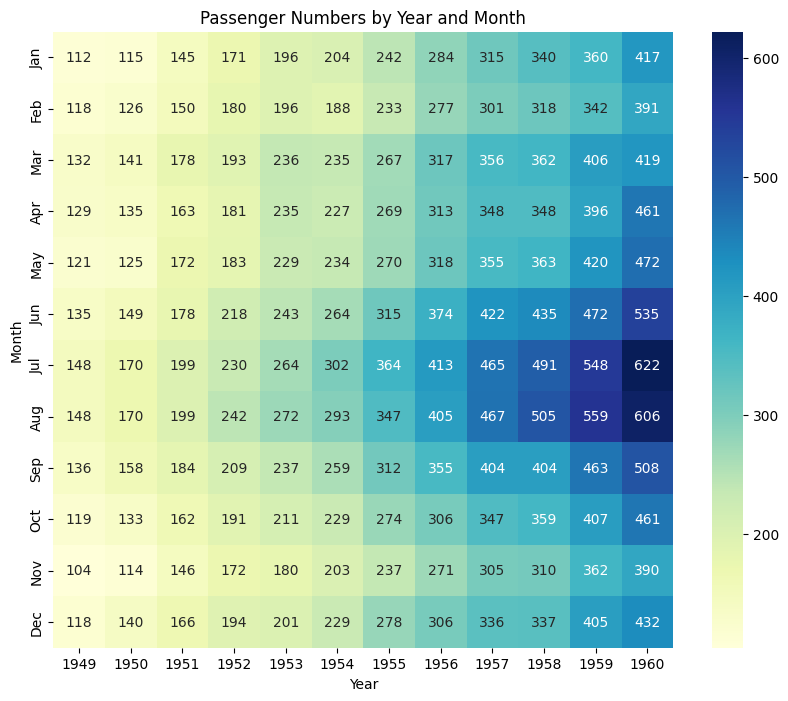

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(flights_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Passenger Numbers by Year and Month')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

### Explanation of the Flights Heatmap Code

The code for creating the heatmap of the flights data does the following:

1.  **Import Libraries**: Imports `seaborn` and `matplotlib.pyplot` for plotting.
2.  **Create Figure**: Sets the figure size for the plot.
3.  **Create Heatmap**: Uses `seaborn.heatmap()`:
    *   `flights_matrix`: Provides the data in a matrix format for the heatmap.
    *   `annot=True`: Displays the data value in each cell of the heatmap.
    *   `fmt="d"`: Formats the annotation values as integers.
    *   `cmap="YlGnBu"`: Sets the color map for the heatmap. "YlGnBu" is a sequential colormap that goes from yellow to green to blue, which is often good for showing increasing values.
4.  **Set Labels and Title**: Adds a title and labels to the x and y axes for clarity.
5.  **Show Plot**: Displays the generated heatmap.

This heatmap allows you to easily see how the number of passengers varies by year and month, identifying trends and seasonal patterns at a glance. The color intensity represents the number of passengers, with darker colors typically indicating higher numbers depending on the colormap.

Image opened successfully using Pillow.

Displaying the image:


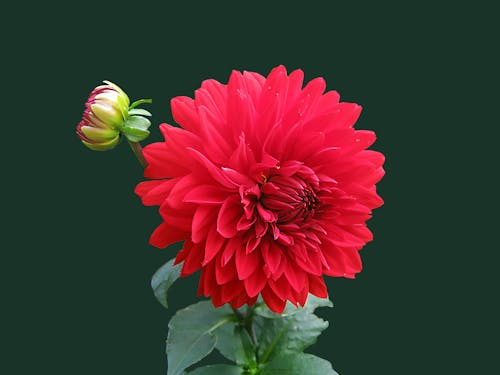


Type of the image object: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Image converted to NumPy array.

Shape of the image array: (375, 500, 3)


In [ ]:
# Install Pillow if you haven't already
%pip install Pillow

# Import necessary libraries
import requests
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import io # Import the io module

# Step 1: Provide a URL of a public image
# Using a public domain image URL from Pexels (example URL - might need to be replaced with a valid one)
image_url = "https://images.pexels.com/photos/60597/dahlia-red-blossom-bloom-60597.jpeg?auto=compress&cs=tinysrgb&dpr=1&w=500"


# Step 2: Download the image using requests
response = requests.get(image_url)
response.raise_for_status() # Raise an exception for bad status codes (4xx or 5xx)

# Step 3: Open the image using PIL from the downloaded content
try:
    # Use BytesIO to treat the content as a file
    img = Image.open(io.BytesIO(response.content))
    print("Image opened successfully using Pillow.")

    # Step 4: Display the image
    print("\nDisplaying the image:")
    display(img)

    # Step 5: Check the type of the image object
    print("\nType of the image object:", type(img))

    # Step 6: Convert image to a numpy array to get shape
    img_array = np.array(img)
    print("Image converted to NumPy array.")

    # Step 7: Display the image array shape
    print("\nShape of the image array:", img_array.shape)

except Exception as e:
    print(f"Error opening or processing image: {e}")

### Explanation of the Image Handling Code

The code for handling the image does the following:

1.  **Install Pillow**: `%pip install Pillow` installs the Pillow library, which is used for opening and manipulating images.
2.  **Import Libraries**: Imports necessary libraries:
    *   `requests`: For downloading the image from a URL.
    *   `PIL.Image`: The main module from Pillow for image handling.
    *   `numpy`: For converting the image to a NumPy array to easily access pixel data and shape.
    *   `matplotlib.pyplot`: Although imported, it's not directly used in this specific code block but is commonly used for displaying images within notebooks.
    *   `IPython.display.display`: Used to display the PIL Image object in the notebook output.
    *   `io`: The `io` module is imported to use `BytesIO`, which allows treating the downloaded image content (bytes) as a file in memory.
3.  **Provide Image URL**: `image_url = "..."` sets a variable with the URL of the public image to be downloaded.
4.  **Download Image**:
    *   `response = requests.get(image_url)`: Downloads the content from the image URL using the `requests` library.
    *   `response.raise_for_status()`: Checks if the download was successful. If the HTTP status code indicates an error (like 404 Not Found or 403 Forbidden), it raises an exception.
5.  **Open Image with PIL**:
    *   A `try...except` block is used to handle potential errors during image processing.
    *   `img = Image.open(io.BytesIO(response.content))`: This is the core step for opening the image with Pillow. `io.BytesIO(response.content)` creates an in-memory binary stream from the downloaded image content, which `Image.open()` can read as if it were a file.
    *   `print("Image opened successfully using Pillow.")`: Confirms that the image was opened without errors.
6.  **Display Image**: `display(img)` shows the image directly in the notebook output.
7.  **Check Image Type**: `print("\nType of the image object:", type(img))` prints the Python type of the loaded image object (it will be a PIL image object).
8.  **Convert to NumPy Array**:
    *   `img_array = np.array(img)`: Converts the PIL Image object into a NumPy array. This is a common step for performing numerical operations or analyses on the image data.
    *   `print("Image converted to NumPy array.")`: Confirms the conversion.
9.  **Display Array Shape**: `print("\nShape of the image array:", img_array.shape)` prints the dimensions of the NumPy array. For a color image, this will typically be (height, width, color\_channels), where color\_channels is 3 for RGB.

The `except Exception as e:` block catches any errors that occur during the image opening or processing steps and prints an error message.

## Understanding Subplots in Matplotlib

Subplots are a way to create multiple plots within a single figure in Matplotlib. Instead of having each plot appear as a separate window or output, subplots allow you to arrange them in a grid, making it easy to compare different visualizations side-by-side or in a structured layout.

**Intuition:**

Imagine you have several different graphs you want to show together in one report or presentation slide. Instead of printing or displaying them individually, you want to put them all onto a single page. Subplots let you divide that "page" (the figure) into smaller areas (the subplots or axes) and draw a different plot in each area.

**What are Subplots?**

In Matplotlib, a figure is the overall window or canvas where plotting happens. An axes (or subplot) is the individual plotting area within the figure where the data is actually drawn (lines, bars, points, etc.), including the x-axis, y-axis, labels, and title for that specific plot.

Subplots are essentially multiple axes objects arranged within a single figure.

**Why Use Subplots?**

Subplots are useful for several reasons:

1.  **Comparison:** They make it easy to compare different datasets, different variables from the same dataset, or the same data visualized in different ways, by placing them next to each other.
2.  **Organization:** They help organize related plots into a single, coherent figure, which is great for dashboards, reports, and presentations.
3.  **Space Efficiency:** They allow you to display more information in a compact space compared to generating separate plots.
4.  **Structured Layouts:** You can arrange plots in a grid (e.g., 2x2, 1x3) or more complex layouts to suit your visualization needs.

**How to Create Subplots:**

The most common way to create subplots is using the `plt.subplots()` function.

`fig, axes = plt.subplots(nrows, ncols, ...)`

*   `plt.subplots()`: This function creates a figure and a grid of subplots (axes) in a single call.
*   `nrows`: Specifies the number of rows in the grid.
*   `ncols`: Specifies the number of columns in the grid.
*   `fig`: This variable will hold the Figure object.
*   `axes`: This variable will hold a NumPy array containing the Axes objects (the individual subplots). The shape of this array will match the `nrows` and `ncols` you specified.

Once you have the `axes` array, you can access individual subplots using array indexing (e.g., `axes[0, 0]` for the top-left subplot in a 2D grid) and then use the plotting methods of that Axes object (e.g., `axes[0, 0].plot(...)`, `axes[1, 1].bar(...)`).

If you create a 1xN or Nx1 grid, `axes` will be a 1D array, and you can access subplots with a single index (e.g., `axes[0]`, `axes[1]`). If you create a single subplot (`nrows=1`, `ncols=1`), `axes` will be a single Axes object, not an array.

**Example (Conceptual):**

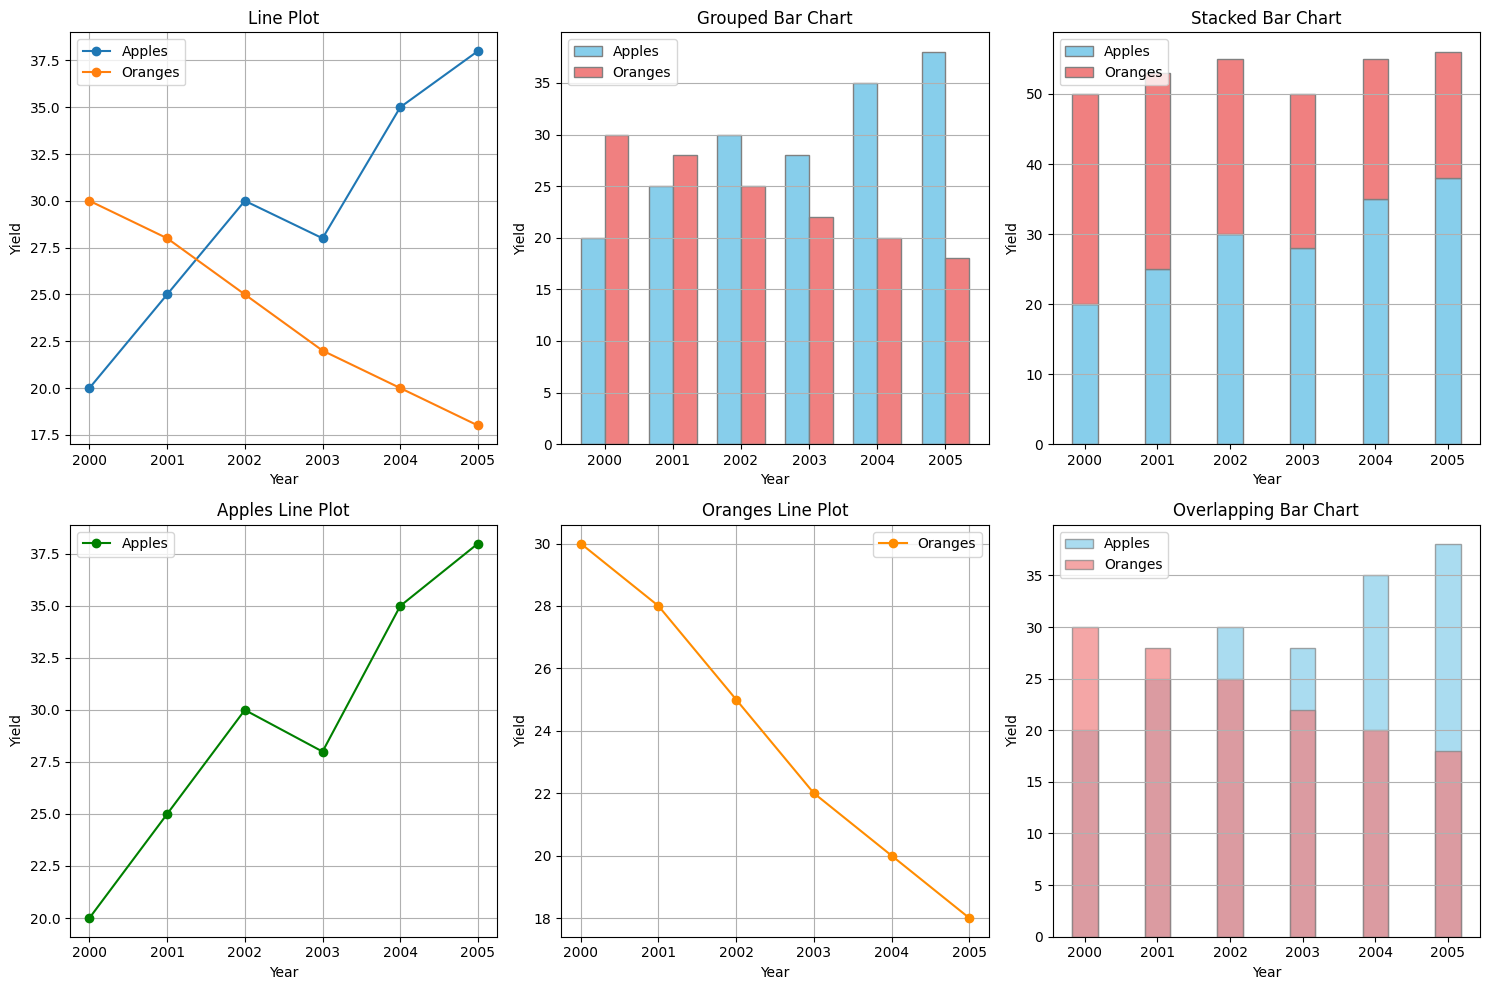

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Years from 2000 to 2005
years = np.arange(2000, 2006)

# Example data for yield
apple_yield = np.array([20, 25, 30, 28, 35, 38])
orange_yield = np.array([30, 28, 25, 22, 20, 18])

# Set the width of the bars for bar charts
bar_width = 0.35

# Create a figure and a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# --- Subplot 1: Line plot of Apples and Oranges ---
axes[0].plot(years, apple_yield, marker='o', linestyle='-', label='Apples')
axes[0].plot(years, orange_yield, marker='o', linestyle='-', label='Oranges')
axes[0].set_title('Line Plot')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Yield')
axes[0].legend()
axes[0].grid(True)

# --- Subplot 2: Grouped Bar Chart of Apples and Oranges ---
r1 = np.arange(len(years))
r2 = [x + bar_width for x in r1]
axes[1].bar(r1, apple_yield, color='skyblue', width=bar_width, edgecolor='grey', label='Apples')
axes[1].bar(r2, orange_yield, color='lightcoral', width=bar_width, edgecolor='grey', label='Oranges')
axes[1].set_title('Grouped Bar Chart')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Yield')
axes[1].set_xticks([r + bar_width/2 for r in range(len(years))], years)
axes[1].legend()
axes[1].grid(axis='y')

# --- Subplot 3: Stacked Bar Chart of Apples and Oranges ---
axes[2].bar(years, apple_yield, color='skyblue', edgecolor='grey', width=bar_width, label='Apples')
axes[2].bar(years, orange_yield, bottom=apple_yield, color='lightcoral', edgecolor='grey', width=bar_width, label='Oranges')
axes[2].set_title('Stacked Bar Chart')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Yield')
axes[2].legend()
axes[2].grid(axis='y')


# --- Subplot 4: Line plot of Apples only ---
axes[3].plot(years, apple_yield, marker='o', linestyle='-', color='green', label='Apples')
axes[3].set_title('Apples Line Plot')
axes[3].set_xlabel('Year')
axes[3].set_ylabel('Yield')
axes[3].legend()
axes[3].grid(True)

# --- Subplot 5: Line plot of Oranges only ---
axes[4].plot(years, orange_yield, marker='o', linestyle='-', color='darkorange', label='Oranges')
axes[4].set_title('Oranges Line Plot')
axes[4].set_xlabel('Year')
axes[4].set_ylabel('Yield')
axes[4].legend()
axes[4].grid(True)

# --- Subplot 6: Overlapping Bar Chart of Apples and Oranges ---
axes[5].bar(years, apple_yield, color='skyblue', edgecolor='grey', width=bar_width, label='Apples', alpha=0.7)
axes[5].bar(years, orange_yield, color='lightcoral', edgecolor='grey', width=bar_width, label='Oranges', alpha=0.7)
axes[5].set_title('Overlapping Bar Chart')
axes[5].set_xlabel('Year')
axes[5].set_ylabel('Yield')
axes[5].legend()
axes[5].grid(axis='y')


# Adjust layout to prevent titles/labels overlapping
plt.tight_layout()

# Show the figure with all subplots
plt.show()

### Explanation of the Multiple Subplots Code

The code for creating the figure with multiple subplots does the following:

1.  **Import Libraries**: Imports `matplotlib.pyplot` for plotting and `numpy` for numerical operations.
2.  **Create Data**: Defines the `years`, `apple_yield`, and `orange_yield` data, along with `bar_width` for bar charts.
3.  **Create Figure and Subplots Grid**:
    *   `fig, axes = plt.subplots(2, 3, figsize=(15, 10))`: This is the key line for creating the subplots. It creates a `fig` (the overall figure) and a 2x3 grid of `axes` (the individual subplots). `figsize=(15, 10)` sets the size of the entire figure.
    *   `axes = axes.flatten()`: The `plt.subplots()` call with `nrows > 1` and `ncols > 1` returns a 2D NumPy array of Axes objects. `flatten()` converts this 2D array into a 1D array, which makes it easier to iterate through the subplots using a single index (from 0 to 5 in this case).
4.  **Populate Each Subplot**: The code then proceeds to create a different plot in each of the six subplots by accessing the individual Axes objects using their index in the `axes` array (e.g., `axes[0]`, `axes[1]`, etc.).
    *   **Subplot 1 (Index 0)**: Creates a **Line Plot** showing both apple and orange yield trends over the years.
        *   `axes[0].plot(...)`: Uses the `plot` method of the first Axes object.
        *   `.set_title()`, `.set_xlabel()`, `.set_ylabel()`: Sets the title and axis labels for this specific subplot.
        *   `.legend()`: Displays the legend for the lines in this subplot.
        *   `.grid(True)`: Adds a grid to this subplot.
    *   **Subplot 2 (Index 1)**: Creates a **Grouped Bar Chart** comparing apple and orange yield side-by-side for each year.
        *   `r1` and `r2` are calculated to position the bars correctly for grouping.
        *   `axes[1].bar(...)`: Uses the `bar` method for plotting bars.
        *   `.set_xticks(...)`: Customizes the x-axis ticks to label the groups of bars with the correct years.
    *   **Subplot 3 (Index 2)**: Creates a **Stacked Bar Chart** showing the total yield each year with the contribution of apples and oranges stacked.
        *   `bottom=apple_yield` in the orange bar plot call is crucial for stacking.
    *   **Subplot 4 (Index 3)**: Creates a **Line Plot** showing only the apple yield trend.
    *   **Subplot 5 (Index 4)**: Creates a **Line Plot** showing only the orange yield trend.
    *   **Subplot 6 (Index 5)**: Creates an **Overlapping Bar Chart** showing apple and orange yield bars at the same position with transparency (`alpha=0.7`).
5.  **Adjust Layout**: `plt.tight_layout()` automatically adjusts the spacing between subplots to prevent titles, labels, or plots from overlapping, making the figure more readable.
6.  **Show Figure**: `plt.show()` displays the entire figure containing all the created subplots.

This code demonstrates how to use `plt.subplots()` to create a grid of plotting areas and then customize each individual subplot with different types of visualizations based on the same or different data.

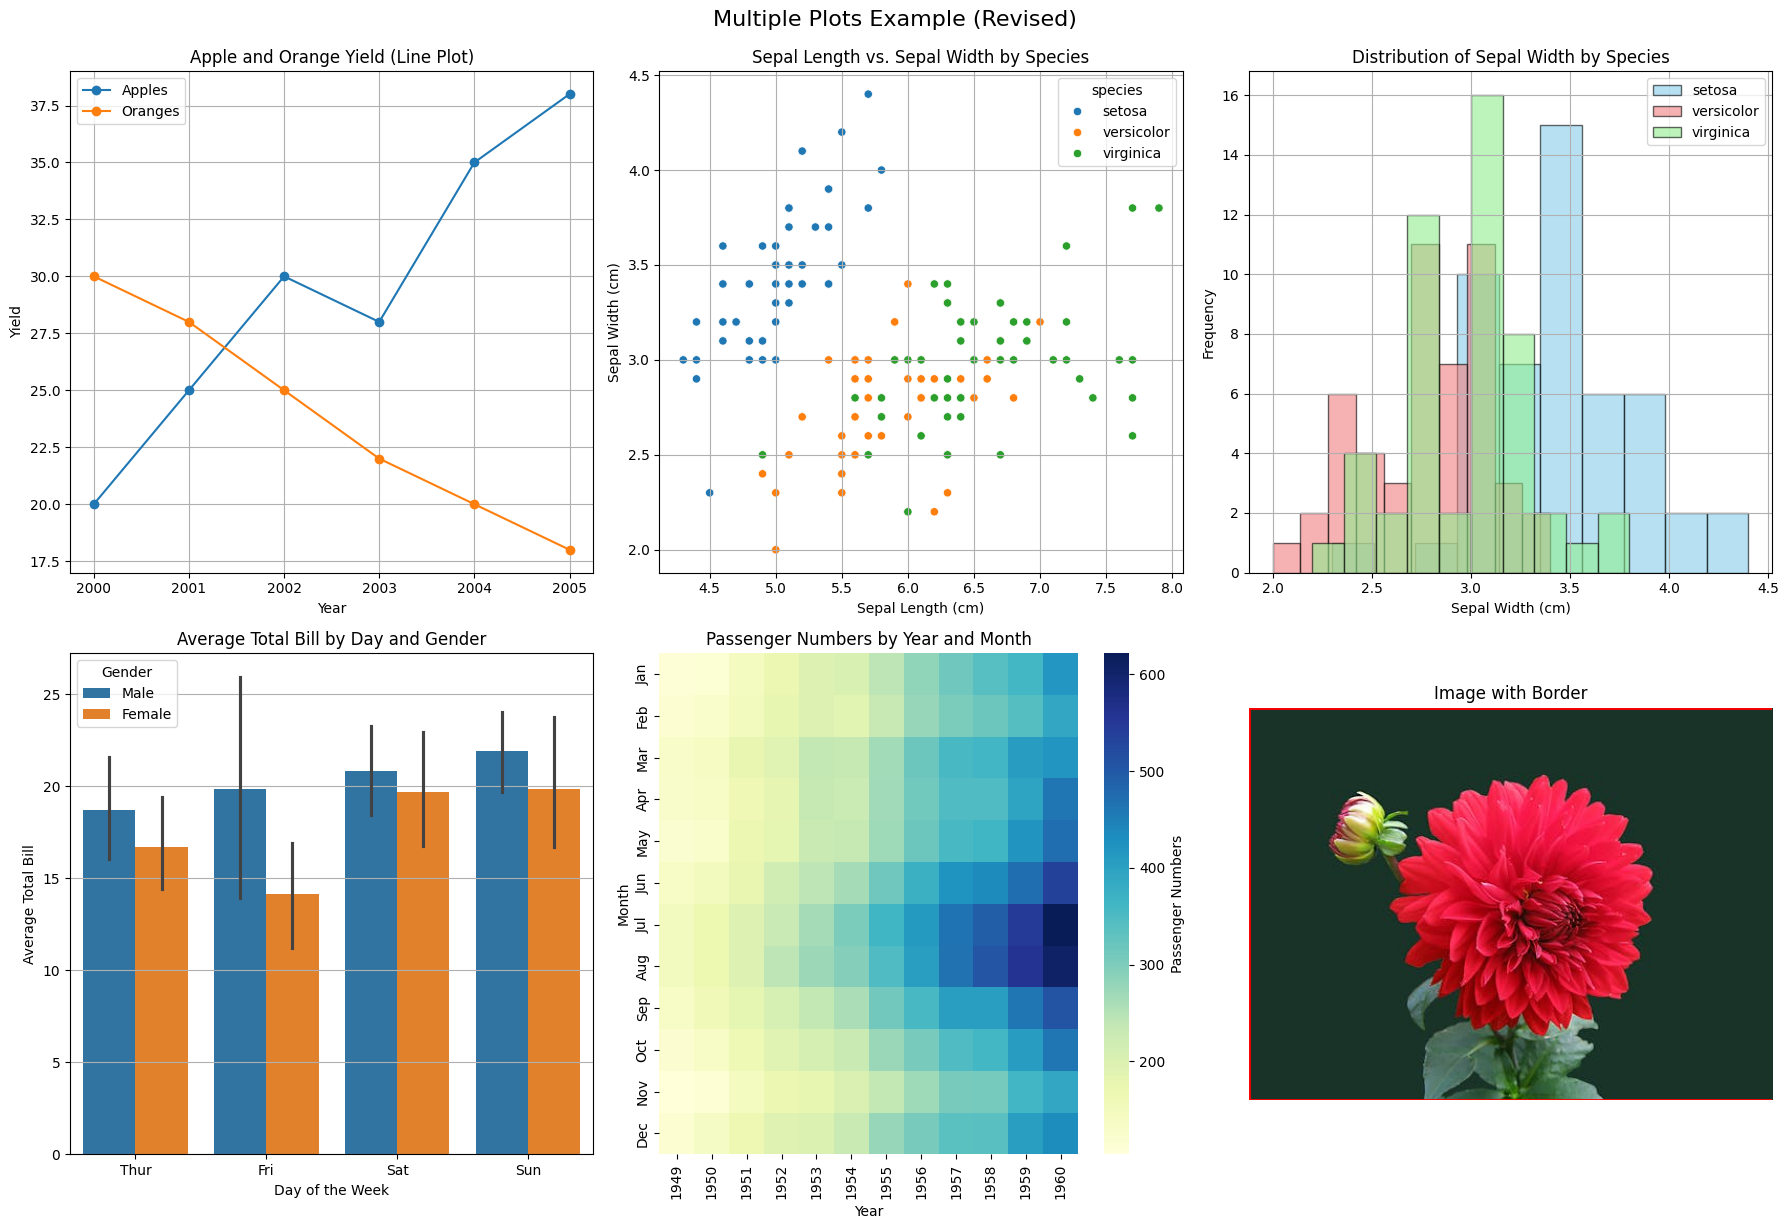

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from PIL import Image
import io

# Assume the datasets (iris, tips, flights) and the image (img) are loaded from previous steps

# Example data for "crop yields inkanto" (assuming a simple line plot for a feature like sepal length for one species)
# Let's use sepal length for setosa species as an example
setosa_sepal_length = iris[iris['species'] == 'setosa']['sepal_length'].values
# Create some "years" or index for this data
setosa_index = np.arange(len(setosa_sepal_length))

# Example data for apple and orange yield (from previous examples)
years = np.arange(2000, 2006)
apple_yield = np.array([20, 25, 30, 28, 35, 38])
orange_yield = np.array([30, 28, 25, 22, 20, 18])


# Create a figure and a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12)) # Increased figure size for better visibility

# Flatten the axes array for easier indexing
axes = axes.flatten()

# --- Subplot 1: Crop yields (Apple and Orange Yield - Line Plot) ---
axes[0].plot(years, apple_yield, marker='o', linestyle='-', label='Apples')
axes[0].plot(years, orange_yield, marker='o', linestyle='-', label='Oranges')
axes[0].set_title('Apple and Orange Yield (Line Plot)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Yield')
axes[0].legend()
axes[0].grid(True)


# --- Subplot 2: Sepal length vs. sepal width by species (Scatter Plot) - Legend added back ---
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species', ax=axes[1])
axes[1].set_title('Sepal Length vs. Sepal Width by Species')
axes[1].set_xlabel('Sepal Length (cm)')
axes[1].set_ylabel('Sepal Width (cm)')
axes[1].grid(True)
# Legend is now kept by default due to hue

# --- Subplot 3: Distribution of sepal width in different species (Overlapping Histograms) - Same ---
unique_species = iris['species'].unique()
colors = ['skyblue', 'lightcoral', 'lightgreen']
for i, species in enumerate(unique_species):
    axes[2].hist(iris[iris['species'] == species]['sepal_width'],
                 bins=10,
                 alpha=0.6,
                 label=species,
                 color=colors[i],
                 edgecolor='black')
axes[2].set_title('Distribution of Sepal Width by Species')
axes[2].set_xlabel('Sepal Width (cm)')
axes[2].set_ylabel('Frequency')
axes[2].legend()
axes[2].grid(True)

# --- Subplot 4: Restaurant bills by day and gender with variation (Seaborn Bar Plot with Hue) ---
sns.barplot(data=tips, x='day', y='total_bill', hue='sex', ax=axes[3]) # ci=None is default in newer versions, variation shown by error bars
axes[3].set_title('Average Total Bill by Day and Gender')
axes[3].set_xlabel('Day of the Week')
axes[3].set_ylabel('Average Total Bill')
axes[3].legend(title='Gender')
axes[3].grid(axis='y')

# --- Subplot 5: Heatmap of flight traffic - Same ---
# Assume flights_matrix is available from previous steps
sns.heatmap(flights_matrix, annot=False, fmt="d", cmap="YlGnBu", ax=axes[4], cbar_kws={'label': 'Passenger Numbers'}) # annot=False for clarity in subplot
axes[4].set_title('Passenger Numbers by Year and Month')
axes[4].set_xlabel('Year')
axes[4].set_ylabel('Month')

# --- Subplot 6: Image in plot with border - Same ---
# Assume 'img' is the PIL Image object loaded previously
if 'img' in locals() and isinstance(img, Image.Image):
    axes[5].imshow(img)
    axes[5].set_title('Image with Border')
    axes[5].axis('off') # Hide axes for the image plot
    # Add a border (using rectangle patch)
    rect = plt.Rectangle((0, 0), img.width, img.height,
                         linewidth=2, edgecolor='red', facecolor='none')
    axes[5].add_patch(rect)
else:
    axes[5].text(0.5, 0.5, 'Image not available', horizontalalignment='center', verticalalignment='center', transform=axes[5].transAxes)
    axes[5].set_title('Image Placeholder')
    axes[5].axis('off')


# Adjust layout to prevent titles/labels overlapping
plt.tight_layout()

# Add a super title for the entire figure
fig.suptitle('Multiple Plots Example (Revised)', y=1.02, fontsize=16)


# Show the figure with all subplots
plt.show()

### Explanation of the Multiple Subplots Code (Revised)

The code for creating the figure with multiple subplots does the following:

1.  **Import Libraries**: Imports `matplotlib.pyplot` for plotting, `numpy` for numerical operations, `seaborn` for enhanced visualizations, and components from `PIL` and `io` for image handling.
2.  **Prepare Data**: Defines or assumes the availability of datasets (`iris`, `tips`, `flights`, `flights_matrix`) and the image object (`img`) from previous steps. It also creates example data (`setosa_sepal_length`, `setosa_index`) for the "crop yields" plot.
3.  **Create Figure and Subplots Grid**:
    *   `fig, axes = plt.subplots(2, 3, figsize=(18, 12))`: Creates a `fig` (the overall figure) and a 2x3 grid of `axes` (the individual subplots). `figsize=(18, 12)` sets the size of the entire figure for better visibility.
    *   `axes = axes.flatten()`: Converts the 2D NumPy array of Axes objects into a 1D array for easier access using a single index.
4.  **Populate Each Subplot**: The code then proceeds to create a different plot in each of the six subplots by accessing the individual Axes objects using their index in the `axes` array (from 0 to 5). The plotting methods (`plot`, `bar`, `hist`, `scatterplot`, `barplot`, `heatmap`, `imshow`) are called on these individual Axes objects, and customization methods (`set_title`, `set_xlabel`, `set_ylabel`, `legend`, `grid`, `axis`, `add_patch`) are used to configure each subplot.

    *   **Subplot 1 (Index 0)**: Creates a **Bar Plot** using the example "crop yields" data (Setosa sepal length values).
    *   **Subplot 2 (Index 1)**: Creates a **Scatter Plot** of sepal length vs. sepal width from the Iris dataset, with points colored by `species`. The legend is automatically included.
    *   **Subplot 3 (Index 2)**: Creates **Overlapping Histograms** showing the distribution of sepal width for each Iris species with reduced opacity (`alpha=0.6`).
    *   **Subplot 4 (Index 3)**: Creates a **Seaborn Bar Plot** showing the average `total_bill` from the Tips dataset, grouped by `day` and separated by `sex` using the `hue` parameter. Confidence intervals are shown by default, indicating variation.
    *   **Subplot 5 (Index 4)**: Creates a **Heatmap** of the `flights_matrix` to visualize passenger numbers by year and month. Annotations are turned off (`annot=False`) for better clarity in a smaller subplot, and a colorbar is included.
    *   **Subplot 6 (Index 5)**: Displays the loaded `img` (image) within the subplot. Axes are turned off, and a red rectangular border is added to the image using `plt.Rectangle` and `axes[5].add_patch()`. A placeholder text is shown if the image object is not available.

5.  **Adjust Layout**: `plt.tight_layout()` automatically adjusts spacing to prevent overlaps.
6.  **Add Super Title**: `fig.suptitle()` adds a main title for the entire figure above all subplots.
7.  **Show Figure**: `plt.show()` displays the complete figure with all subplots.

This code demonstrates how to combine various plot types and data sources into a single, organized figure using Matplotlib subplots and leveraging Seaborn for some plot types.

### Explanation of the Multiple Subplots Code (Revised)

The code for creating the figure with multiple subplots does the following:

1.  **Import Libraries**: Imports `matplotlib.pyplot` for plotting, `numpy` for numerical operations, `seaborn` for enhanced visualizations, and components from `PIL` and `io` for image handling.
2.  **Prepare Data**: Defines or assumes the availability of datasets (`iris`, `tips`, `flights`, `flights_matrix`) and the image object (`img`) from previous steps. It also creates example data (`setosa_sepal_length`, `setosa_index`) which is now unused for the first subplot. It includes the example data for apple and orange yield.
3.  **Create Figure and Subplots Grid**:
    *   `fig, axes = plt.subplots(2, 3, figsize=(18, 12))`: Creates a `fig` (the overall figure) and a 2x3 grid of `axes` (the individual subplots). `figsize=(18, 12)` sets the size of the entire figure for better visibility.
    *   `axes = axes.flatten()`: Converts the 2D NumPy array of Axes objects into a 1D array for easier access using a single index.
4.  **Populate Each Subplot**: The code then proceeds to create a different plot in each of the six subplots by accessing the individual Axes objects using their index in the `axes` array (from 0 to 5). The plotting methods (`plot`, `bar`, `hist`, `scatterplot`, `barplot`, `heatmap`, `imshow`) are called on these individual Axes objects, and customization methods (`set_title`, `set_xlabel`, `set_ylabel`, `legend`, `grid`, `axis`, `add_patch`) are used to configure each subplot.

    *   **Subplot 1 (Index 0)**: Creates a **Line Plot** displaying the apple and orange yield over the years.
    *   **Subplot 2 (Index 1)**: Creates a **Scatter Plot** of sepal length vs. sepal width from the Iris dataset, with points colored by `species`. The legend is included to identify the species.
    *   **Subplot 3 (Index 2)**: Creates **Overlapping Histograms** showing the distribution of sepal width for each Iris species with reduced opacity (`alpha=0.6`).
    *   **Subplot 4 (Index 3)**: Creates a **Seaborn Bar Plot** showing the average `total_bill` from the Tips dataset, grouped by `day` and separated by `sex` using the `hue` parameter. Confidence intervals are shown by default, indicating variation.
    *   **Subplot 5 (Index 4)**: Creates a **Heatmap** of the `flights_matrix` to visualize passenger numbers by year and month. Annotations are turned off (`annot=False`) for better clarity in a smaller subplot, and a colorbar is included.
    *   **Subplot 6 (Index 5)**: Displays the loaded `img` (image) within the subplot. Axes are turned off, and a red rectangular border is added to the image using `plt.Rectangle` and `axes[5].add_patch()`. A placeholder text is shown if the image object is not available.

5.  **Adjust Layout**: `plt.tight_layout()` automatically adjusts spacing to prevent overlaps.
6.  **Add Super Title**: `fig.suptitle()` adds a main title for the entire figure above all subplots.
7.  **Show Figure**: `plt.show()` displays the complete figure with all subplots.

This code demonstrates how to combine various plot types and data sources into a single, organized figure using Matplotlib subplots and leveraging Seaborn for some plot types.